***
# **Reddit: EMI Calculation**

## After Pooling, Normalization Model

Scores changed again, because prior I had just one E and I dimension, for computing word's E and I similarity (word_freq_df). 
* Need to be two E and I dimensions, based on model
***

In [1]:
# packages
!pip install sentence-transformers==2.2.2
!pip install huggingface_hub #==0.25.1

!pip install wordcloud
!pip install adjustText

In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import json
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.cm as cm
import matplotlib.patches as mpatches

from sklearn.feature_extraction.text import TfidfVectorizer
import math
from adjustText import adjust_text
from scipy.stats import pearsonr
from numpy import linalg as LA
from scipy.stats import zscore
import zipfile


## **Import Models and Dictionaries**


In [5]:
# import model
finetuned_model = SentenceTransformer('../00_embedding_models/after_pool_finetuned_sentence_model_wordlim_10_window_5')
self_build_model = SentenceTransformer('../00_embedding_models/after_pool_self_build_sentence_model_wordlim_10_window_5')


# import dictionaries
evidence = pd.read_csv("../dictionaries_emi/evidence_lexicon.csv")
intuition = pd.read_csv("../dictionaries_emi/intuition_lexicon.csv")


## **Dictionary Embeddings**

In [23]:
# Get embeddings for dictionary words

finetuned_evidence_embeddings = finetuned_model.encode(evidence['evidence_keywords'])
finetuned_intuition_embeddings = finetuned_model.encode(intuition['intuition_keywords'])

self_evidence_embeddings = self_build_model.encode(evidence['evidence_keywords'])
self_intuition_embeddings = self_build_model.encode(intuition['intuition_keywords'])

# check
#base_evidence_embeddings[0]

In [24]:

# their norm
evidence_norms_ft = np.linalg.norm(finetuned_evidence_embeddings, axis=1)
intuition_norms_ft = np.linalg.norm(finetuned_intuition_embeddings, axis=1)

evidence_norms_sb = np.linalg.norm(self_evidence_embeddings, axis=1)
intuition_norms_sb = np.linalg.norm(self_intuition_embeddings, axis=1)


# z-scores
evidence_zscores_ft = zscore(evidence_norms_ft)
intuition_zscores_ft = zscore(intuition_norms_ft)

evidence_zscores_sb = zscore(evidence_norms_sb)
intuition_zscores_sb = zscore(intuition_norms_sb)


# Make df
df_evidence = pd.DataFrame({
    "word": evidence['evidence_keywords'],
    "embedding_ft": list(finetuned_evidence_embeddings), 
    "embedding_sb": list(self_evidence_embeddings), 
    "norm_ft": evidence_norms_ft,
    "norm_sb": evidence_norms_sb,
    "z-score_ft": evidence_zscores_ft,
    "z-score_sb": evidence_zscores_sb
})


df_intuition = pd.DataFrame({
    "word": intuition['intuition_keywords'],
    "embedding_ft": list(finetuned_intuition_embeddings), 
    "embedding_sb": list(self_intuition_embeddings), 
    "norm_ft": intuition_norms_ft,
    "norm_sb": intuition_norms_sb,
    "z-score_ft": intuition_zscores_ft,
    "z-score_sb": intuition_zscores_sb
})


In [25]:
df_evidence
df_intuition

word                                       embedding_ft  \
0          belief  [-0.0075392807, -0.07178262, 0.066346, 0.01491...   
1         believe  [-0.14456914, -0.12517047, 0.0073199975, -0.04...   
2           bogus  [-0.031176435, 0.02730458, -0.09395502, 0.0104...   
3    common sense  [-0.030430658, -0.1533699, -0.0528886, -0.0164...   
4        distrust  [-0.025816705, -0.03155031, -0.027444234, -0.1...   
5           doubt  [-0.024575498, -0.08904101, -0.105645746, 0.01...   
6            fake  [-0.05571608, -0.020713903, -0.09340723, -0.03...   
7       fake news  [-0.067898445, 0.013978101, -0.043538406, -0.0...   
8         feeling  [-0.031783108, -0.08968694, 0.07686389, -0.015...   
9         genuine  [-0.09000086, 0.005017711, 0.026022993, -0.009...   
10          guess  [-0.077573344, -0.1505027, -0.027603991, -0.03...   
11            gut  [-0.08795755, -0.03409369, 0.021819342, 0.0392...   
12       instinct  [0.0014449556, 0.03122885, 0.06964892, -0.0391...   
13      intuition  [-0.013304326, -0.04064394, 0.008408305, -0.02...   
14            lie  [-0.17252313, -0.03440552, -0.045408685, 0.091...   
15       mistrust  [-0.045716967, -0.023826472, 0.0038906822, -0....   
16        opinion  [-0.04500219, -0.054408092, 0.013949481, 0.043...   
17    perspective  [0.034077894, 0.023717035, 0.059219018, -0.083...   
18          phony  [-0.076077126, 0.012122479, -0.048804708, 0.01...   
19  point of view  [-0.041815832, -0.08809167, 0.024790531, -0.08...   
20     propaganda  [-0.07188968, 0.039379507, 0.019833872, -0.020...   
21          sense  [-0.073550604, -0.12005675, 0.015902597, -0.04...   
22      suspicion  [0.019693896, -0.029127905, -0.08982011, -0.03...   
23           view  [-0.008572271, -0.077193156, 0.0298713, -0.070...   
24      viewpoint  [-0.05473504, -0.02615863, 0.07212138, -0.0668...   
25          wrong  [-0.1514677, -0.083890244, -0.058557022, 0.031...   
26         advice  [0.022380974, 0.032218125, 0.02184442, 0.02645...   
27        deceive  [-0.08560867, -0.074584514, -0.07421709, -0.01...   
28      deception  [-0.102047734, 0.037946455, 0.017588422, 0.028...   
29      dishonest  [-0.10779317, -0.032820642, -0.040517822, 0.04...   
30     dishonesty  [-0.063474946, -0.007528123, -0.026636701, 0.0...   
31        mislead  [-0.14245144, -0.09689436, -0.07727272, 0.0149...   
32       mistaken  [-0.06021292, -0.13544141, -0.014514777, 0.067...   
33        suggest  [-0.09563164, -0.16292273, -0.07192603, -0.046...   
34     suggestion  [-0.0017678448, -0.14020595, 0.053004242, 0.00...   

                                         embedding_sb  norm_ft  norm_sb  \
0   [-0.01910139, 0.016191622, 0.012423026, -0.000...      1.0      1.0   
1   [0.0031847502, 0.034254186, -0.031160157, -0.0...      1.0      1.0   
2   [0.044025585, 0.061845653, -0.119277336, 0.062...      1.0      1.0   
3   [0.0026562898, 0.0016142175, 0.043993805, 0.00...      1.0      1.0   
4   [-0.0025138098, 0.028608538, -0.017959578, -0....      1.0      1.0   
5   [-0.026670137, 0.009226528, -0.020877007, -0.0...      1.0      1.0   
6   [0.047672693, 0.008144061, 0.055483293, 0.0543...      1.0      1.0   
7   [0.0056715636, -0.001750626, 0.06407066, -0.03...      1.0      1.0   
8   [0.06544729, 0.055427957, 0.07317751, -0.00757...      1.0      1.0   
9   [-0.08150366, -0.03803336, -0.06731406, 0.0217...      1.0      1.0   
10  [0.0012672965, -0.0416251, 0.06311406, 0.02179...      1.0      1.0   
11  [0.038906828, 0.05646613, -0.10572985, -0.0014...      1.0      1.0   
12  [0.03607853, 0.0014808278, 0.009498539, 0.0304...      1.0      1.0   
13  [-0.0022421787, -0.063572876, -0.04659524, -0....      1.0      1.0   
14  [-0.05593381, 0.068150096, -0.12674136, -0.135...      1.0      1.0   
15  [0.040490776, -0.001798296, -0.058836658, -0.0...      1.0      1.0   
16  [-0.07288851, -0.039266977, -0.026676778, -0.0...      1.0      1.0   
17  [-0.08003525, -0.14432687, -0.017843325, -0.09...      1.0      1.

In [27]:
# mean of word embeddings, then normalize --> concept embedding

evidence_dim_ft = df_evidence['embedding_ft'].mean(axis = 0) / LA.norm(df_evidence['embedding_ft'].mean(axis = 0))
intuition_dim_ft = df_intuition['embedding_ft'].mean(axis = 0) / LA.norm(df_intuition['embedding_ft'].mean(axis = 0))

evidence_dim_sb = df_evidence['embedding_sb'].mean(axis = 0) / LA.norm(df_evidence['embedding_sb'].mean(axis = 0))
intuition_dim_sb = df_intuition['embedding_sb'].mean(axis = 0) / LA.norm(df_intuition['embedding_sb'].mean(axis = 0))

## **Import Reddit Data**


In [8]:
training_texts_all = pd.read_csv("01_word_analysis/output/training_texts_all.csv")
training_texts_all

id                                               text  len
0        c7ecp8d  regarding perry vs brown current name prop cas...   65
1        c7edr13                                              wrong    1
2        c7ee45j  adhering askscience style moderation could ela...    6
3        c7eevhv  conference november grad student yale presente...   56
4        c7efwy3  stealing rules might become trend rules heavil...   12
...          ...                                                ...  ...
7035716  18mfx16  supreme court colorado disqualified trump futu...   27
7035717  18mfyba  supreme court colorado disqualified trump futu...   27
7035718  18p9iet  saturday folks let kick back cup coffee share ...   59
7035719  18qmiau  happy holidays welcome happened state last wee...  105
7035720  18uirzt  saturday folks let kick back cup coffee share ...   59

[7035721 rows x 3 columns]

In [9]:
subreddits = ['Ask_Politics' , 'Askpolitics', 'PoliticalDiscussion', 'PoliticalDebate', 'NeutralPolitics','politics']

subreddits_reduced = ['Ask_Politics' , 'Askpolitics', 'PoliticalDiscussion', 'PoliticalDebate', 'NeutralPolitics']


In [9]:
# reddit data
Ask_Pol_path = "../../../data/Ask_Politics_new_preprocessing_com_rep.csv"
Askpol_path = "../../../data/Askpolitics_new_preprocessing_com_rep.csv"
PolDis_path = "../../../data/PoliticalDiscussion_new_preprocessing_com_rep.csv"
PolDeb_path = "../../../data/PoliticalDebate_new_preprocessing_com_rep.csv"
NeuPol_path = "../../../data/NeutralPolitics_new_preprocessing_com_rep.csv"

pol_path = "../../../politics_preprocess/output/splitted_politics_data.zip"


In [10]:
# import data
Ask_Politics = pd.read_csv(Ask_Pol_path)
Askpolitics = pd.read_csv(Askpol_path)
PoliticalDiscussion = pd.read_csv(PolDis_path)
PoliticalDebate = pd.read_csv(PolDeb_path)
NeutralPolitics = pd.read_csv(NeuPol_path)


In [13]:

# politics from zip files
df_chunks = []
with zipfile.ZipFile(pol_path, 'r') as zf:
    file_list = zf.namelist()  # Get all file names in ZIP

    # Sort to maintain order (if needed)
    file_list.sort()  

    print("Files found in ZIP:", file_list)  # Debugging step

    for file in file_list:
        with zf.open(file) as f:
            df_chunk = pd.read_csv(f,  quotechar='"', encoding="utf-8")  
            df_chunks.append(df_chunk)  # Store the chunk


politics = pd.concat(df_chunks, ignore_index=True)

print(f"Successfully loaded {len(politics)} rows from {pol_path}")

Files found in ZIP: ['data_part_1.csv', 'data_part_2.csv', 'data_part_3.csv', 'data_part_4.csv', 'data_part_5.csv']
Successfully loaded 4175294 rows from ../../../politics_preprocess/output/splitted_politics_data.zip


In [11]:
cols_to_select = ['msg_id_parent', 'msg_id_child', 'submission_id',
                 'subreddit',
                 'body_child', 'body_parent', 'submission_text',
                 'exact_time_child', 
                 'author_child', 'author_parent', 'author_submission']

In [12]:
df_dict = {
    'Ask_Politics' : Ask_Politics[cols_to_select],
    'Askpolitics' : Askpolitics[cols_to_select],
    'PoliticalDiscussion' : PoliticalDiscussion[cols_to_select],
    'PoliticalDebate' : PoliticalDebate[cols_to_select],
    'NeutralPolitics' : NeutralPolitics[cols_to_select],
    'politics' : politics[cols_to_select]
    
}



In [13]:
# remove quoatation marks from politics and Pol Disc.

for subr in ["politics","PoliticalDiscussion"]:
    for col in ['msg_id_parent', 'msg_id_child', 'submission_id',
                'subreddit', 
                'body_child', 'body_parent', 'submission_text',
                'author_child', 'author_parent', 'author_submission']:
        if df_dict[subr][col].dtype == "object":  # Apply only to string columns
            df_dict[subr][col] = df_dict[subr][col].str.strip('"')



/tmp/ipykernel_11439/3061814478.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dict[subr][col] = df_dict[subr][col].str.strip('"')


In [14]:
df_dict['PoliticalDiscussion']#.columns

msg_id_parent msg_id_child submission_id            subreddit  \
0            c1pvucb      c1pwq17         grqj9  PoliticalDiscussion   
1            c1pw8hh      c1pwsh4         grqj9  PoliticalDiscussion   
2            c1pwkxk      c1pyoun         grsi7  PoliticalDiscussion   
3            c1rzgqn      c1rzi35         h1vss  PoliticalDiscussion   
4            c1s5jhd      c1s5lgd         h1vss  PoliticalDiscussion   
...              ...          ...           ...                  ...   
668128       kfqdbma      kfrien2       18vas2y  PoliticalDiscussion   
668129       kfpr5h6      kfrj1xb       18vas2y  PoliticalDiscussion   
668130       kfn0ce4      kfrl1pz       18uou00  PoliticalDiscussion   
668131       kfoiclq      kfrlbx9       18u0jvx  PoliticalDiscussion   
668132       kfp5jp9      kfrlogl       18uryo1  PoliticalDiscussion   

                                               body_child  \
0       Well thanks for having the patience to wade th...   
1       Very good point - I felt bad using the labels ...   
2       Well that was insightful. Thanks Reminds me of...   
3       Karma Circlejerks of this magnitude are few an...   
4       I didn't know there was a withdrawal scheduled...   
...                                                   ...   
668128  I meant the legislature members from a given p...   
668129  I was more so alluding to the reputation of th...   
668130  Putin has been threatening to use them for ove...   
668131  She wasnt even the best black woman for the jo...   
668132  Then rich people would be the only ones who ca...   

                                              body_parent  \
0       You claim to know your audience so well in you...   
1       I think you missed a core issue here. the prob...   
2       I think you mean ridiculous partisan bickering...   
3       I think everyone's too busy trying to get in w...   
4       I think we'll also see close scrutiny of US  P...   
...                                                   ...   
668128  State parties vary wildly. Michigan GOP is a c...   
668129  I disagree about the senators being undiscipli...   
668130  Putin has been threatening to use them for ove...   
668131  Wouldn't be much of a race. Nikki Haley would ...   
668132  No money in election campaigns. No Lobbies. Pu...   

                                          submission_text  exact_time_child  \
0       I've been an adherent of or flirted with most ...      1.303074e+09   
1       I've been an adherent of or flirted with most ...      1.303075e+09   
2                            Oops, I mean bipartisanship.      1.303098e+09   
3       Does it make Obama look tough on terror? Will ...      1.304315e+09   
4       Does it make Obama look tough on terror? Will ...      1.304397e+09   
...                                                   ...               ...   
668128  America is reputed for their legislature with ...      1.704064e+09   
668129  America is reputed for their legislature with ...      1.704065e+09   
668130  Much has been made about Putin using a nuke to...      1.704066e+09   
668131  This assumes that in the next couple of months...      1.704066e+09   
668132  What are your favorite features or quirks of c...      1.704066e+09   

            author_child         author_parent author_submission  
0               dtmike07             theiamina          dtmike07  
1               dtmike07                avd007          dtmike07  
2               snorky94  ReferentiallySeethru          snorky94  
3         funkinthetrunk             daychilde    funkinthetrunk  
4         funkinthetrunk           ACHILLESiii    funkinthetrunk  
...                  ...                   ...               ...  
668128     Awesomeuser90               Sands43     Awesomeuser90  
668129     Awesomeuser90    CorporateNonperson     Awesomeuser90  
668130            gaxxzz          BitterFuture        Mad_Prog_1  
668131            kimanf          SeekSeekScan     DenseY

## **Add cleaned EMI Tokens and Len**

* reduce text to only the encoded words and the length

In [15]:
# merge, based on id
# merge default --> inner: only keep interactions, where


for subr in subreddits:
    
    # parents
    df_dict[subr] = df_dict[subr].merge(training_texts_all, left_on =['msg_id_parent'], right_on = 'id').drop(
        columns = ['id']).rename(columns = {'text' : 'parent_tokens', 'len' : 'parent_len'})
    df_dict[subr]['parent_tokens'] = df_dict[subr]['parent_tokens'].apply(lambda x: str(x))
    
    # childer
    df_dict[subr] = df_dict[subr].merge(training_texts_all, left_on =['msg_id_child'], right_on = 'id').drop(
        columns = ['id']).rename(columns = {'text' : 'child_tokens', 'len' : 'child_len'})
    df_dict[subr]['child_tokens'] = df_dict[subr]['child_tokens'].apply(lambda x: str(x))
    
    # submissions
    df_dict[subr] = df_dict[subr].merge(training_texts_all, left_on =['submission_id'], right_on = 'id').drop(
        columns = ['id']).rename(columns = {'text' : 'submission_tokens', 'len' : 'submission_len'})
    df_dict[subr]['submission_tokens'] = df_dict[subr]['submission_tokens'].apply(lambda x: str(x))



In [16]:
df_dict['PoliticalDiscussion']#.columns

msg_id_parent msg_id_child submission_id            subreddit  \
0            c1pvucb      c1pwq17         grqj9  PoliticalDiscussion   
1            c1pw8hh      c1pwsh4         grqj9  PoliticalDiscussion   
2            c1pwkxk      c1pyoun         grsi7  PoliticalDiscussion   
3            c1rzgqn      c1rzi35         h1vss  PoliticalDiscussion   
4            c1s5jhd      c1s5lgd         h1vss  PoliticalDiscussion   
...              ...          ...           ...                  ...   
667330       kfpr5h6      kfqb2k9       18vas2y  PoliticalDiscussion   
667331       kfpr5h6      kfrj1xb       18vas2y  PoliticalDiscussion   
667332       kfqdbma      kfqv4r9       18vas2y  PoliticalDiscussion   
667333       kfqdbma      kfrien2       18vas2y  PoliticalDiscussion   
667334       kfrbgwt      kfri7k6       18vas2y  PoliticalDiscussion   

                                               body_child  \
0       Well thanks for having the patience to wade th...   
1       Very good point - I felt bad using the labels ...   
2       Well that was insightful. Thanks Reminds me of...   
3       Karma Circlejerks of this magnitude are few an...   
4       I didn't know there was a withdrawal scheduled...   
...                                                   ...   
667330  In WA, non-federal elections are generally non...   
667331  I was more so alluding to the reputation of th...   
667332  Look, just because theyre openly brawling with...   
667333  I meant the legislature members from a given p...   
667334  Something like the Bundestag for instance. Als...   

                                              body_parent  \
0       You claim to know your audience so well in you...   
1       I think you missed a core issue here. the prob...   
2       I think you mean ridiculous partisan bickering...   
3       I think everyone's too busy trying to get in w...   
4       I think we'll also see close scrutiny of US  P...   
...                                                   ...   
667330  I disagree about the senators being undiscipli...   
667331  I disagree about the senators being undiscipli...   
667332  State parties vary wildly. Michigan GOP is a c...   
667333  State parties vary wildly. Michigan GOP is a c...   
667334  Undisciplined members relative to who? Are you...   

                                          submission_text  exact_time_child  \
0       I've been an adherent of or flirted with most ...      1.303074e+09   
1       I've been an adherent of or flirted with most ...      1.303075e+09   
2                            Oops, I mean bipartisanship.      1.303098e+09   
3       Does it make Obama look tough on terror? Will ...      1.304315e+09   
4       Does it make Obama look tough on terror? Will ...      1.304397e+09   
...                                                   ...               ...   
667330  America is reputed for their legislature with ...      1.704048e+09   
667331  America is reputed for their legislature with ...      1.704065e+09   
667332  America is reputed for their legislature with ...      1.704055e+09   
667333  America is reputed for their legislature with ...      1.704064e+09   
667334  America is reputed for their legislature with ...      1.704064e+09   

             author_child         author_parent author_submission  \
0                dtmike07             theiamina          dtmike07   
1                dtmike07                avd007          dtmike07   
2                snorky94  ReferentiallySeethru          snorky94   
3          funkinthetrunk             daychilde    funkinthetrunk   
4          funkinthetrunk           ACHILLESiii    funkinthetrunk   
...                   ...                   ...               ...   
667330       wereallbozos    CorporateNonperson     Awesomeuser90   
667331      Awesomeuser90    CorporateNonperson     Awesomeuser90   
667332  ThePowerOfStories               Sands43     Awesomeuser90   
667333      Awesomeuser90            

## **Import List of all Corpus Words and filter relevant tokens**

* all corpus words
* each got embedded
* cosine similarity to E and I dictionaries
* $\to$ used for **clipping**
    * when calculating E-similarity of a sentence, only average embeddings of  words, which have a positive E similarity
    * same for I 

In [17]:
# list of all corpus words --> encoded

word_freq_df = pd.read_csv("01_word_analysis/output/word_freq_df_encoded.csv")
word_freq_df

word  frequency  len  \
0           trump    1220659    5   
1          people    1028121    6   
2           would    1003710    5   
3            like     943124    4   
4           think     697822    5   
...           ...        ...  ...   
70444    lofgrens         10    8   
70445    whirring         10    8   
70446  classicals         10   10   
70447  reoccuring         10   10   
70448       coyne         10    5   

                               finetuned_word_embeddings  \
0      [-3.13823484e-02 -2.61992053e-03  1.65601559e-...   
1      [-0.14400238 -0.0171606  -0.0098665  -0.057251...   
2      [-0.04946502 -0.10319191  0.004725   -0.045335...   
3      [-1.39497966e-01 -6.58366159e-02 -7.62398094e-...   
4      [-0.13961822 -0.14024219 -0.032562   -0.052419...   
...                                                  ...   
70444  [ 4.66981605e-02  7.31774569e-02 -3.35381972e-...   
70445  [-0.02988168 -0.01952807 -0.07115778 -0.107075...   
70446  [ 0.03468389  0.03578478 -0.04271318 -0.052482...   
70447  [-1.37644401e-02 -4.52592783e-02 -1.42818287e-...   
70448  [ 0.1209516   0.00644954 -0.07555415  0.041022...   

                                    self_word_embeddings  finetuned_word_I  \
0      [ 0.06490105 -0.03075592  0.07042432  0.047348...          0.383221   
1      [-5.45188524e-02 -8.64222087e-03 -1.38002928e-...          0.340338   
2      [-7.40609691e-02 -3.80961597e-02  7.01286346e-...          0.225115   
3      [-0.07020836 -0.01737436 -0.09395944  0.065777...          0.276800   
4      [ 0.00476243 -0.04358237 -0.06306772  0.047155...          0.559520   
...                                                  ...               ...   
70444  [-0.00041437  0.031691    0.00102678  0.009565...         -0.068512   
70445  [ 3.87946106e-02 -1.07550481e-02  4.49683666e-...         -0.018869   
70446  [-1.27218980e-02 -1.08203694e-01 -2.78461538e-...          0.080467   
70447  [-0.03976834  0.06969618 -0.03328598 -0.035773...          0.027779   
70448  [ 4.58784290e-02 -6.14939034e-02  3.49795856e-...          0.071631   

       finetuned_word_E  self_word_I  self_word_E  
0              0.248026     0.011930    -0.075950  
1              0.217950     0.032023    -0.075854  
2              0.253686    -0.089805    -0.021537  
3              0.165570     0.063724    -0.073947  
4              0.381980     0.282668     0.035809  
...                 ...          ...          ...  
70444          0.033004    -0.041946     0.065054  
70445         -0.100058     0.043625     0.001492  
70446          0.054090     0.077077     0.093413  
70447         -0.027500     0.063547     0.010703  
70448          0.095652    -0.048543     0.042333  

[70449 rows x 9 columns]

In [18]:
word_freq_df[word_freq_df['word'] == "austria"]

word  frequency  len  \
11421  austria        722    7   

                               finetuned_word_embeddings  \
11421  [ 7.20771030e-02 -9.21710953e-03 -5.51279224e-...   

                                    self_word_embeddings  finetuned_word_I  \
11421  [-6.30977303e-02  9.29012150e-03  9.23101977e-...         -0.115672   

       finetuned_word_E  self_word_I  self_word_E  
11421         -0.036458    -0.158132    -0.058609

In [19]:
# filter all words, that have a positive E similarity
# filter all words, that have a positive I similarity

predef_lists = {
    'finetuned_pos_E': set(word_freq_df.loc[word_freq_df['finetuned_word_E'] > 0, 'word']),
    'finetuned_pos_I': set(word_freq_df.loc[word_freq_df['finetuned_word_I'] > 0, 'word']),
    'self_pos_E': set(word_freq_df.loc[word_freq_df['self_word_E'] > 0, 'word']),
    'self_pos_I': set(word_freq_df.loc[word_freq_df['self_word_I'] > 0, 'word']),
}


In [20]:
# function to filter relevant words to embedd, per text_type

def extract_similar_tokens(df, text_type, model, predef_lists):

    # get words to regard
    pos_E_words_set = predef_lists[f"{model}_pos_E"] 
    pos_I_words_set = predef_lists[f"{model}_pos_I"]

    # define the text col: parent, child, submission
    text_col = f"{text_type}_tokens"
    
    def filter_words(text):
        
        words = text.split()  # Tokenize sentence (assuming space-separated words)
        
        E_words = [word for word in words if word in pos_E_words_set]
        I_words = [word for word in words if word in pos_I_words_set]
        
        return " ".join(E_words), " ".join(I_words)

    # apply, and rename based on model and text type
    df[[f'{model}_{text_type}_tokens_for_E', f'{model}_{text_type}_tokens_for_I']] = df[text_col].apply(lambda x: pd.Series(filter_words(x)))
     
    
    return df

In [21]:
# looong runtime!

for subr in subreddits:
    for model in ['finetuned', 'self']:
        for text_type in ['parent', 'child', 'submission']:
            df_dict[subr] = extract_similar_tokens(df_dict[subr], text_type, model, predef_lists)
            



In [22]:
df_dict["PoliticalDiscussion"]

msg_id_parent msg_id_child submission_id            subreddit  \
0            c1pvucb      c1pwq17         grqj9  PoliticalDiscussion   
1            c1pw8hh      c1pwsh4         grqj9  PoliticalDiscussion   
2            c1pwkxk      c1pyoun         grsi7  PoliticalDiscussion   
3            c1rzgqn      c1rzi35         h1vss  PoliticalDiscussion   
4            c1s5jhd      c1s5lgd         h1vss  PoliticalDiscussion   
...              ...          ...           ...                  ...   
667330       kfpr5h6      kfqb2k9       18vas2y  PoliticalDiscussion   
667331       kfpr5h6      kfrj1xb       18vas2y  PoliticalDiscussion   
667332       kfqdbma      kfqv4r9       18vas2y  PoliticalDiscussion   
667333       kfqdbma      kfrien2       18vas2y  PoliticalDiscussion   
667334       kfrbgwt      kfri7k6       18vas2y  PoliticalDiscussion   

                                               body_child  \
0       Well thanks for having the patience to wade th...   
1       Very good point - I felt bad using the labels ...   
2       Well that was insightful. Thanks Reminds me of...   
3       Karma Circlejerks of this magnitude are few an...   
4       I didn't know there was a withdrawal scheduled...   
...                                                   ...   
667330  In WA, non-federal elections are generally non...   
667331  I was more so alluding to the reputation of th...   
667332  Look, just because theyre openly brawling with...   
667333  I meant the legislature members from a given p...   
667334  Something like the Bundestag for instance. Als...   

                                              body_parent  \
0       You claim to know your audience so well in you...   
1       I think you missed a core issue here. the prob...   
2       I think you mean ridiculous partisan bickering...   
3       I think everyone's too busy trying to get in w...   
4       I think we'll also see close scrutiny of US  P...   
...                                                   ...   
667330  I disagree about the senators being undiscipli...   
667331  I disagree about the senators being undiscipli...   
667332  State parties vary wildly. Michigan GOP is a c...   
667333  State parties vary wildly. Michigan GOP is a c...   
667334  Undisciplined members relative to who? Are you...   

                                          submission_text  exact_time_child  \
0       I've been an adherent of or flirted with most ...      1.303074e+09   
1       I've been an adherent of or flirted with most ...      1.303075e+09   
2                            Oops, I mean bipartisanship.      1.303098e+09   
3       Does it make Obama look tough on terror? Will ...      1.304315e+09   
4       Does it make Obama look tough on terror? Will ...      1.304397e+09   
...                                                   ...               ...   
667330  America is reputed for their legislature with ...      1.704048e+09   
667331  America is reputed for their legislature with ...      1.704065e+09   
667332  America is reputed for their legislature with ...      1.704055e+09   
667333  America is reputed for their legislature with ...      1.704064e+09   
667334  America is reputed for their legislature with ...      1.704064e+09   

             author_child         author_parent  ...  \
0                dtmike07             theiamina  ...   
1                dtmike07                avd007  ...   
2                snorky94  ReferentiallySeethru  ...   
3          funkinthetrunk             daychilde  ...   
4          funkinthetrunk           ACHILLESiii  ...   
...                   ...                   ...  ...   
667330       wereallbozos    CorporateNonperson  ...   
667331      Awesomeuser90    CorporateNonperson  ...   
667332  ThePowerOfStories               Sands43  ...   
667333      Awesomeuser90               Sands43  ...   
667334      Awesomeuser90         zlefin_actual  ...   

                             finetuned_child_tokens_fo

### Save

In [25]:
# make df's with relevant info and save


for subr in subreddits:
    
    df_dict[subr][['msg_id_parent', 'msg_id_child', 'submission_id', 'subreddit',
    'exact_time_child', 'author_child', 'author_parent', 'author_submission', 

    'parent_tokens', 'parent_len', 'child_tokens', 'child_len', 'submission_tokens', 'submission_len',
    
    'finetuned_parent_tokens_for_E', 'finetuned_parent_tokens_for_I',
    'finetuned_child_tokens_for_E', 'finetuned_child_tokens_for_I',
    'finetuned_submission_tokens_for_E', 'finetuned_submission_tokens_for_I',
    
    'self_parent_tokens_for_E', 'self_parent_tokens_for_I',
    'self_child_tokens_for_E', 'self_child_tokens_for_I',
    'self_submission_tokens_for_E', 'self_submission_tokens_for_I']].to_csv(f"output_clipped/{subr}_tokens.csv", index = False)




In [33]:
# reimport 

df_dict = {}
for subr in subreddits_reduced:
    
    df_dict[subr] = pd.read_csv(f"output_clipped/{subr}_tokens.csv")

df_dict


{'Ask_Politics':       msg_id_parent msg_id_child submission_id     subreddit  \
 0           c7ecp8d      c7ecs2n        14m325  Ask_Politics   
 1           c7ecp8d      c7ecxpk        14m325  Ask_Politics   
 2           c7ecp8d      c7eflag        14m325  Ask_Politics   
 3           c7efx8q      c7ejh1d        14m325  Ask_Politics   
 4           c7efx8q      c7f8140        14m325  Ask_Politics   
 ...             ...          ...           ...           ...   
 54198       jw3iofg      k8f1j20       15frtsy  Ask_Politics   
 54199       fcyrekh      k8kje6m        ejj4xd  Ask_Politics   
 54200       k9fz0e9      k9wo2gy       17w3s8o  Ask_Politics   
 54201       k9fz0e9      kb8de02       17w3s8o  Ask_Politics   
 54202       k9n9hx4      k9xzggt       17w3s8o  Ask_Politics   
 
        exact_time_child          author_child         author_parent  \
 0          1.355167e+09             karmanaut          Ramblin_Dash   
 1          1.355167e+09          zoolander951          Ra

***
## **Chunk Politics**

In [ ]:
# clipped

politics_tokens = pd.read_csv("output_clipped/politics_tokens.csv")
politics_tokens

### For **clipped**

In [ ]:
chunk_size = 500_000
politics_chunks_clipped = [politics_tokens.iloc[i:i+chunk_size] for i in range(0, len(politics_tokens), chunk_size)]

### For **non-clipped**

In [15]:
politics_tokens_non_clipped = politics_tokens[['msg_id_parent', 'msg_id_child', 'submission_id', 'subreddit',
                                               'exact_time_child', 'author_child', 'author_parent',
                                               'author_submission', 'parent_tokens', 'parent_len', 'child_tokens',
                                               'child_len', 'submission_tokens', 'submission_len']]

In [16]:
chunk_size = 500_000
politics_chunks_non_clipped = [politics_tokens_non_clipped.iloc[i:i+chunk_size] for i in range(0, len(politics_tokens_non_clipped), chunk_size)]

***
## **Cosine Similarity Function**

In [28]:
def compute_cosine_similarity(row, col, reference_emb):
    return cosine_similarity(row[col].reshape(1, -1), reference_emb.reshape(1, -1))[0][0]

## **Embedd Sentences, Compute Cosine Simialrity**

* non length corrected
* modular for clipping or not

In [29]:
# dict to access the models
models = {'finetuned' : finetuned_model,
         'self': self_build_model}

concept_dict = {'finetuned' : {'evidence': evidence_dim_ft,
                               'intuition' : intuition_dim_ft},
                'self' : {'evidence': evidence_dim_sb,
                          'intuition' : intuition_dim_sb}
               }


In [30]:

def encode_and_compute_similarities(df, text_type, model, clipping = True):

    # embeddings --------------------------------------------------------------------------
    
    # define columns with tokens to regard for E and I similarity, based on model and text type
    if clipping == True:
        tokens_E = f'{model}_{text_type}_tokens_for_E'
        tokens_I = f'{model}_{text_type}_tokens_for_I'
       
        #E_embeddings = f"{model}_{text_type}_E_emb_clipped"
        #I_embeddings = f"{model}_{text_type}_I_emb_clipped"
        
        #E_similarity = f"{model}_{text_type}_E_clipped"
        #I_similarity = f"{model}_{text_type}_I_clipped"
    else:
        tokens_E = f'{text_type}_tokens'
        tokens_I = f'{text_type}_tokens'
        
        #E_embeddings = f"{model}_{text_type}_E_emb"
        #I_embeddings = f"{model}_{text_type}_I_emb"
        
        #E_similarity = f"{model}_{text_type}_E"
        #I_similarity = f"{model}_{text_type}_I"

    
    E_embeddings = f"{model}_{text_type}_E_emb"
    I_embeddings = f"{model}_{text_type}_I_emb"
    
    E_similarity = f"{model}_{text_type}_E"
    I_similarity = f"{model}_{text_type}_I"
    
    
    # get the model to use
    model_here = models[model]

    # some rows have NaN's as tokens for E or I, because they only contain one word, i.e. autria, which has a negative similarity to both 
    # therefore there are no tokens to encode
    mask_E = df[tokens_E].notna()
    mask_I = df[tokens_I].notna()

    df[E_embeddings] = np.nan
    df[I_embeddings] = np.nan

    texts_E = df.loc[mask_E, tokens_E].astype(str)
    texts_I = df.loc[mask_I, tokens_I].astype(str)
    
    # Encode
    encoded_E = list(model_here.encode(texts_E.tolist()))
    encoded_I = list(model_here.encode(texts_I.tolist()))
    
    # Assign back correctly using .iloc or align by index
    df.loc[mask_E, E_embeddings] = pd.Series(encoded_E, index=texts_E.index)
    df.loc[mask_I, I_embeddings] = pd.Series(encoded_I, index=texts_I.index)

   
   
    # compute cosine similarity ------------------------------------------------------------
    concept_E = concept_dict[model]['evidence'].reshape(1, -1)
    concept_I = concept_dict[model]['intuition'].reshape(1, -1)
    
    df[E_similarity] = df[E_embeddings].apply(lambda emb: cosine_similarity(emb.reshape(1, -1), concept_E)[0][0] if isinstance(emb, np.ndarray) else np.nan)
    df[I_similarity] = df[I_embeddings].apply(lambda emb: cosine_similarity(emb.reshape(1, -1), concept_I)[0][0] if isinstance(emb, np.ndarray) else np.nan)
    
    
    return df


## **Clipped Similarity Scores**

#### **Subreddits except politics**

In [ ]:
# apply - first

df_dict_clipped = {}

for subr in ["Ask_Politics", "Askpolitics", "NeutralPolitics", "PoliticalDiscussion", "PoliticalDebate"]:

    print(subr)
    
    for em in ['finetuned', 'self']: # embedding model
        print(em)
        for tt in ['parent', 'child', 'submission']: # text txpe
            print(tt)
            df_dict_clipped[subr] = encode_and_compute_similarities(df_dict[subr], tt, em, clipping = True)


    df_dict_clipped[subr][['msg_id_parent', 'msg_id_child', 'submission_id', 'subreddit',
                           'exact_time_child', 'author_child', 'author_parent', 'author_submission', 
                           'parent_tokens', 'parent_len', 'child_tokens', 'child_len', 'submission_tokens', 'submission_len',

                           'finetuned_parent_E_emb', 'finetuned_parent_I_emb', 
                           'finetuned_child_E_emb', 'finetuned_child_I_emb', 
                           'finetuned_submission_E_emb', 'finetuned_submission_I_emb',

                            'self_parent_E_emb', 'self_parent_I_emb', 
                            'self_child_E_emb', 'self_child_I_emb', 
                            'self_submission_E_emb', 'self_submission_I_emb',
                        
                            'finetuned_parent_E', 'finetuned_parent_I',
                            'finetuned_child_E', 'finetuned_child_I',
                            'finetuned_submission_E', 'finetuned_submission_I',
                        
                            'self_parent_E', 'self_parent_I',
                            'self_child_E', 'self_child_I',
                            'self_submission_E', 'self_submission_I']].to_csv(f"output_clipped/{subr}_emb.csv", index = False)
                                        



Ask_Politics
finetuned
parent


/tmp/ipykernel_11439/2006043400.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[array([-4.76003326e-02, -1.46762103e-01, -3.61844189e-02, -8.00899714e-02,
        -4.21972573e-02, -6.17596097e-02, -9.03050378e-02,  4.86571193e-02,
        -8.68874788e-02,  5.20751858e-03,  6.32287040e-02,  6.08778931e-02,
        -7.82719180e-02, -2.81787217e-02, -2.75303400e-03, -3.56574319e-02,
         1.79394730e-03, -3.92355509e-02, -6.10619271e-03, -4.37222011e-02,
         2.74495948e-02,  9.53545868e-02, -3.96153368e-02,  8.32256153e-02,
         2.10707579e-02,  1.72637105e-02,  4.69885133e-02, -7.46455565e-02,
        -1.10500138e-02,  1.49664516e-02, -7.03884736e-02, -4.44405265e-02,
         4.74979319e-02,  1.35572450e-02, -3.63845080e-02, -3.78170572e-02,
        -6.62239566e-02, -7.28334347e-03, -8.06051344e-02,  3.02538797e-02,
        -5.86752295e-02,  1.09057099e-01, -5.82924113e-02, -4.63452861e-02,
       

child


/tmp/ipykernel_11439/2006043400.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[array([-6.36497140e-02, -1.44366652e-01, -5.72122484e-02, -6.43032193e-02,
        -2.57260818e-03, -9.36281607e-02, -1.32072121e-01, -1.44857112e-02,
        -8.58422145e-02,  1.70531403e-02,  8.42918605e-02,  7.77691457e-05,
        -4.10806760e-02, -1.05780344e-02, -1.00464709e-02, -5.29162809e-02,
        -1.61907524e-02, -2.10527573e-02, -1.61522422e-02, -4.30045351e-02,
         2.06257124e-02,  3.47138532e-02, -7.82460123e-02,  3.66434902e-02,
         3.26807564e-03, -1.97099149e-03,  5.03974184e-02,  6.16633985e-03,
        -5.77260973e-03,  9.51245427e-03, -2.65756692e-03, -3.45116965e-02,
         3.55840139e-02,  1.74288843e-02,  1.02723110e-02, -8.13190546e-03,
        -7.77703822e-02,  2.46493798e-02, -8.65831375e-02,  5.56149893e-02,
        -5.53167723e-02,  1.09489791e-01, -6.05040677e-02, -8.21467936e-02,
       

submission


/tmp/ipykernel_11439/2006043400.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[array([-3.93627509e-02, -6.29842281e-02,  3.39946114e-02, -9.23039764e-02,
         1.71317067e-03,  4.15596813e-02, -2.86880657e-02, -8.50771554e-04,
        -6.82079494e-02,  9.67948884e-03,  3.20593715e-02,  1.12793706e-01,
        -6.34883419e-02, -8.72837827e-02, -1.51837217e-02, -9.34389085e-02,
         3.78640629e-02, -1.50003303e-02,  4.86211479e-02,  2.95713507e-02,
         4.65618595e-02,  1.11994736e-01, -2.81719328e-03,  7.62031749e-02,
        -4.17488664e-02,  9.49978158e-02,  1.34064658e-02, -9.02307630e-02,
         6.44005388e-02, -4.43988629e-02, -3.53702866e-02, -1.30288582e-02,
         3.68480273e-02, -1.68005507e-02, -9.30164158e-02,  1.17107118e-02,
        -1.89723987e-02, -3.81505489e-02, -3.67044136e-02, -1.97646562e-02,
        -8.89679939e-02,  1.64741650e-01,  3.99337290e-03, -4.91919108e-02,
       

self
parent


/tmp/ipykernel_11439/2006043400.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[array([-8.84473547e-02, -7.27445483e-02, -2.76126433e-02, -6.97665289e-02,
         8.26670323e-03,  7.73350429e-03, -1.41812295e-01,  3.13989408e-02,
         6.79718554e-02, -2.96383984e-02, -7.39438692e-03,  3.62657234e-02,
        -4.90419082e-02, -2.10357551e-03, -1.18304826e-02,  1.69219226e-02,
        -6.55998141e-02,  7.94490115e-05,  9.40891076e-03, -1.88585613e-02,
         2.77064350e-02,  2.31078807e-02,  4.23986018e-02, -7.78798163e-02,
         1.25578521e-02, -6.64332137e-02, -3.51431742e-02,  2.24106219e-02,
        -7.67929479e-02, -4.58215587e-02, -1.06370389e-01,  9.66658145e-02,
        -3.84855345e-02,  9.95421596e-03, -9.66178626e-02,  4.40816469e-02,
        -4.48751375e-02,  8.05451572e-02,  1.40969632e-02,  3.58078652e-03,
        -3.25663164e-02,  2.37375982e-02,  3.67847201e-03, -6.32042810e-02,
       

child


/tmp/ipykernel_11439/2006043400.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[array([-0.16487773, -0.07924995,  0.02118118, -0.07957049,  0.031727  ,
        -0.01161785, -0.13605763,  0.11214427,  0.01923564, -0.00972683,
        -0.03787705,  0.01559041, -0.05160708, -0.017403  , -0.06956257,
        -0.01170131, -0.01096738, -0.04952757,  0.01414978, -0.10855307,
        -0.03091242, -0.01483447,  0.03076153, -0.04704402,  0.06124535,
        -0.06048352, -0.00249274,  0.11147526, -0.0087447 , -0.03597037,
        -0.09455544, -0.06732774, -0.01829944,  0.06566454, -0.04763666,
         0.11018147, -0.07490226,  0.07582434,  0.04134275, -0.07392178,
         0.01783617, -0.08786231, -0.00541849, -0.04088034,  0.01232459,
        -0.02684942,  0.00612258, -0.01962381,  0.01685842, -0.0966378 ,
         0.00726797, -0.02459914,  0.01800746,  0.0161423 , -0.01509522,
         0.03519238, -0.03805144, -0.056

submission


/tmp/ipykernel_11439/2006043400.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[array([ 9.87275038e-03, -5.90802804e-02, -6.20388240e-02, -3.38296928e-02,
         7.21416324e-02,  6.27147406e-02, -7.89923295e-02, -5.69925383e-02,
         4.43895198e-02, -1.01044867e-02,  2.63794269e-02, -3.42053138e-02,
         2.22687703e-02,  4.88398876e-03, -4.35034595e-02, -7.10831210e-02,
        -1.03819408e-01,  1.31416142e-01,  4.16607112e-02,  2.22214404e-02,
         8.51167291e-02,  3.54208387e-02,  2.92179938e-02, -4.15029265e-02,
        -5.15618436e-02, -5.23781292e-02, -2.56360807e-02,  4.42016162e-02,
        -8.30876902e-02,  1.10959867e-02, -4.44402844e-02, -6.74572289e-02,
        -4.73873466e-02, -4.65262979e-02, -8.62438902e-02, -7.86853954e-03,
        -8.08160603e-02,  4.23622271e-03, -8.01781937e-02,  2.70787030e-02,
         4.90863919e-02, -2.52430011e-02, -2.26704422e-02, -4.62088399e-02,
       

#### **Apply to Politics Chunks**


In [37]:

df_dict_clipped_politics = {}

for i in range(0, len(politics_chunks)):
    
    for em in ['finetuned', 'self']: # embedding model
        #print(em)
        for tt in ['parent', 'child', 'submission']: # text txpe
            #print(tt)
            df_dict_clipped_politics[f"politics_{i}"] = encode_and_compute_similarities(politics_chunks[i], tt, em, clipping = True)

    df_dict_clipped_politics[f"politics_{i}"][['msg_id_parent', 'msg_id_child', 'submission_id', 'subreddit',
                                               'exact_time_child', 'author_child', 'author_parent', 'author_submission', 
                                               'parent_tokens', 'parent_len', 'child_tokens', 'child_len', 'submission_tokens', 'submission_len',

                                               'finetuned_parent_E_emb', 'finetuned_parent_I_emb', 
                                               'finetuned_child_E_emb', 'finetuned_child_I_emb', 
                                               'finetuned_submission_E_emb', 'finetuned_submission_I_emb',
        
                                                'self_parent_E_emb', 'self_parent_I_emb', 
                                                'self_child_E_emb', 'self_child_I_emb', 
                                                'self_submission_E_emb', 'self_submission_I_emb',
                                            
                                                'finetuned_parent_E', 'finetuned_parent_I',
                                                'finetuned_child_E', 'finetuned_child_I',
                                                'finetuned_submission_E', 'finetuned_submission_I',
                                            
                                                'self_parent_E', 'self_parent_I',
                                                'self_child_E', 'self_child_I',
                                                'self_submission_E', 'self_submission_I']].to_csv(f"output_clipped/politics_{i}_emb.csv", index = False)
                                        



/tmp/ipykernel_845/2006043400.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[E_embeddings] = np.nan
/tmp/ipykernel_845/2006043400.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[I_embeddings] = np.nan
/tmp/ipykernel_845/2006043400.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[array([-0.01790288, -0.03748915,  0.07718238, -0.08079851, -0.05455821,
        -0.06844921,  0.03383921,  0.03400221, -0.09195489,  0.075

## **Non Clipped Similarity Scores**



In [35]:
# apply
df_dict_non_clipped = {}

for subr in ["Ask_Politics", "Askpolitics", "NeutralPolitics", "PoliticalDiscussion", "PoliticalDebate"]:
    print(subr)
    
    for em in ['finetuned', 'self']: # embedding model
        for tt in ['parent', 'child', 'submission']: # text txpe
            df_dict_non_clipped[subr] = encode_and_compute_similarities(df_dict[subr], tt, em, clipping = False)

    df_dict_non_clipped[subr][['msg_id_parent', 'msg_id_child', 'submission_id', 'subreddit',
                               'exact_time_child', 'author_child', 'author_parent', 'author_submission', 
                               'parent_tokens', 'parent_len', 'child_tokens', 'child_len', 'submission_tokens', 'submission_len',
                               
                               'finetuned_parent_E_emb', 'finetuned_parent_I_emb',
                               'finetuned_child_E_emb', 'finetuned_child_I_emb', 
                               'finetuned_submission_E_emb', 'finetuned_submission_I_emb',
                               
                               'self_parent_E_emb', 'self_parent_I_emb',
                               'self_child_E_emb', 'self_child_I_emb', 
                               'self_submission_E_emb', 'self_submission_I_emb',
                               
                               'finetuned_parent_E', 'finetuned_parent_I',
                               'finetuned_child_E', 'finetuned_child_I',
                               'finetuned_submission_E', 'finetuned_submission_I',
                               
                               'self_parent_E', 'self_parent_I',
                               'self_child_E', 'self_child_I',
                               'self_submission_E', 'self_submission_I']].to_csv(f"output_non_clipped/{subr}_emb.csv", index = False)
                                



Ask_Politics


/tmp/ipykernel_414/2006043400.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[array([-3.89609039e-02, -1.45731270e-01, -3.87618393e-02, -6.43726215e-02,
        -5.73381521e-02, -5.94910048e-02, -7.49318302e-02,  3.77179608e-02,
        -8.36278573e-02, -4.49754437e-03,  5.86029738e-02,  6.36537150e-02,
        -7.30706528e-02, -3.48696485e-02, -1.62672158e-02, -4.05293256e-02,
         1.83149765e-03, -3.77977006e-02, -7.11686211e-03, -4.48523872e-02,
         3.39727812e-02,  1.11166947e-01, -4.98672761e-02,  8.14216733e-02,
         3.30076329e-02,  1.53530668e-02,  4.47881371e-02, -5.59064448e-02,
        -1.56420525e-02,  1.55554023e-02, -5.33092506e-02, -3.67825627e-02,
         3.49978730e-02,  1.55635374e-02, -3.18158157e-02, -3.77390981e-02,
        -6.49970099e-02,  1.38900969e-02, -9.33291167e-02,  3.20482440e-02,
        -6.53140321e-02,  1.22447789e-01, -5.16626984e-02, -4.31448035e-02,
         

Askpolitics


/tmp/ipykernel_414/2006043400.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[array([-0.01688897, -0.10414483, -0.01121556, -0.05203543, -0.0849039 ,
        -0.0721548 , -0.0603857 , -0.09322352, -0.08923648,  0.00204783,
         0.08285361,  0.03707824, -0.07717148, -0.03440142,  0.02486969,
        -0.06058064,  0.00057064, -0.04844464, -0.01859737, -0.02963383,
         0.04912863,  0.01569557, -0.08492209,  0.04574616, -0.03833725,
        -0.03523963, -0.00560776, -0.07248673,  0.00054657, -0.02406287,
        -0.12323862,  0.00391897,  0.04988817,  0.00484648, -0.07690538,
        -0.00552656, -0.02629737, -0.01768385, -0.07888978,  0.01840355,
        -0.02036642,  0.08836996, -0.00840782, -0.06314639,  0.02085811,
        -0.03800864,  0.0289589 ,  0.00358776,  0.01495797,  0.09675265,
         0.03891947,  0.01208034, -0.00155404,  0.01839443, -0.02152047,
         0.0098809 ,  0.0552751 ,  0.06173

NeutralPolitics


/tmp/ipykernel_414/2006043400.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[array([-6.46944046e-02, -8.37180987e-02, -3.21268551e-02, -1.32548567e-02,
        -6.01775572e-02, -1.56281609e-02, -1.43636823e-01,  5.40321600e-03,
        -7.30913505e-02,  5.09692244e-02,  4.54006270e-02,  6.50400445e-02,
        -5.10359295e-02, -9.75188836e-02, -7.23095424e-03, -1.65938586e-02,
         3.72457653e-02, -3.54518853e-02,  3.95725714e-03, -3.23986784e-02,
         5.44834659e-02, -6.04391843e-03, -3.51977162e-02,  6.85471967e-02,
         2.99421530e-02, -3.38946842e-02, -1.95643827e-02, -2.13737898e-02,
        -1.47680035e-02,  1.41170798e-02, -1.06254287e-01, -4.06408161e-02,
         9.29746330e-02,  3.32233272e-02, -4.90213297e-02, -4.20986209e-03,
        -6.91184923e-02, -5.47981029e-03, -3.16806994e-02,  2.99661458e-02,
        -7.26219416e-02,  8.40934217e-02, -6.60554096e-02, -7.71394074e-02,
        -

PoliticalDiscussion


/tmp/ipykernel_414/2006043400.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[array([-0.07251348, -0.10149038, -0.02429166, -0.01787512, -0.07986451,
        -0.05265716, -0.14140978,  0.02966885, -0.06412049,  0.01064281,
         0.09857377,  0.07728553, -0.04083539, -0.0245438 , -0.05596035,
        -0.07792659, -0.01691479, -0.04696238, -0.03350156, -0.08646403,
         0.04893185,  0.0054871 , -0.07663542,  0.08640654, -0.02893732,
        -0.02751715, -0.00389244, -0.0761497 , -0.00957697, -0.00516602,
        -0.12077079, -0.04009565,  0.06716362,  0.05969542, -0.02821942,
        -0.02459221, -0.02206858, -0.00130266, -0.06271161, -0.01485627,
        -0.09324783,  0.11923376, -0.06401669, -0.02490505,  0.0024994 ,
         0.00688946,  0.02202836, -0.02179105, -0.01479536,  0.06694783,
         0.03267836,  0.03206017,  0.03485716,  0.03340003, -0.06199385,
         0.01011576,  0.07114994,  0.06661

PoliticalDebate


/tmp/ipykernel_414/2006043400.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[array([-1.03041388e-01, -6.63732216e-02, -2.67429911e-02, -5.69536611e-02,
         3.90385324e-03, -7.92870969e-02, -1.73091605e-01, -8.29114988e-02,
        -7.58094117e-02, -4.52437587e-02,  1.33282706e-01,  7.74392411e-02,
        -1.26963362e-01, -1.25244504e-03, -3.89882699e-02, -2.79875193e-02,
        -4.43682559e-02,  1.85985137e-02, -1.95267349e-02, -5.62659651e-02,
        -2.76918169e-02,  4.43763752e-03, -1.98937804e-02,  6.98060170e-02,
         3.28197144e-03, -6.39296621e-02, -4.73348312e-02, -2.41007805e-02,
        -4.79798056e-02, -1.52953779e-02,  1.41912140e-02, -1.45650227e-02,
        -1.67583581e-04,  8.64400864e-02, -4.53916714e-02,  2.81796213e-02,
         6.01907633e-03,  1.04238605e-02, -5.75293563e-02,  5.75214103e-02,
        -1.13929726e-01,  3.50133516e-02, -6.94947988e-02, -1.13278806e-01,
         

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)


In [28]:
# apply to politics 

df_dict_non_clipped_politics = {}

for i in range(len(politics_chunks_non_clipped)):
    
    part = i+1
    print("Currently at Part:", part)
    
    for em in ['finetuned', 'self']: # embedding model
        #print(em)
        for tt in ['parent', 'child', 'submission']: # text txpe
            #print(tt)
            df_dict_non_clipped_politics[f"politics_{part}"] = encode_and_compute_similarities(politics_chunks_non_clipped[i], tt, em, clipping = False)

    df_dict_non_clipped_politics[f"politics_{part}"][['msg_id_parent', 'msg_id_child', 'submission_id', 'subreddit',
                                                      'exact_time_child', 'author_child', 'author_parent', 'author_submission', 
                                                      'parent_tokens', 'parent_len', 'child_tokens', 'child_len', 'submission_tokens', 'submission_len',
                                                      
                                                      'finetuned_parent_E_emb', 'finetuned_parent_I_emb', 
                                                      'finetuned_child_E_emb', 'finetuned_child_I_emb', 
                                                      'finetuned_submission_E_emb', 'finetuned_submission_I_emb',
                                                      'self_parent_E_emb', 'self_parent_I_emb', 
                                                      'self_child_E_emb', 'self_child_I_emb', 
                                                      'self_submission_E_emb', 'self_submission_I_emb',
                                                      'finetuned_parent_E', 'finetuned_parent_I',
                                                      'finetuned_child_E', 'finetuned_child_I',
                                                      'finetuned_submission_E', 'finetuned_submission_I',
 
                                                      'self_parent_E', 'self_parent_I',
                                                      'self_child_E', 'self_child_I',
                                                      'self_submission_E', 'self_submission_I']].to_csv(f"output_non_clipped/politics_{part}_emb.csv", index = False)




Currently at Part: 1
Currently at Part: 2


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


Currently at Part: 3


IOStream.flush timed out
IOStream.flush timed out


Currently at Part: 4
Currently at Part: 5
Currently at Part: 6
Currently at Part: 7
Currently at Part: 8


IOStream.flush timed out


Currently at Part: 9


## **Reimport Clipped Scores**

In [50]:
df_clipped_politics = pd.DataFrame()

for i in range(8):
    df_clipped_politics = pd.concat([df_clipped_politics, pd.read_csv(f"output_clipped/politics_{i}_emb.csv")]).reset_index(drop = True)

df_clipped_politics

msg_id_parent msg_id_child submission_id subreddit  \
0             c0ae9r5      c0aeb6y         8tp50  politics   
1             c0aeds9      c0aee4d         8tp50  politics   
2             c0aeds9      c0aeglj         8tp50  politics   
3             c0aeds9      c0aehqw         8tp50  politics   
4             c0aecro      c0aegcb         8tp50  politics   
...               ...          ...           ...       ...   
4171695       kfkh5ib      kfmd52k       18uirzt  politics   
4171696       kfklsb6      kforzbx       18uirzt  politics   
4171697       kfmq5kr      kfp6tzv       18uirzt  politics   
4171698       kfp3d4v      kfp8xh8       18uirzt  politics   
4171699       kfkiulh      kfpvec4       18uirzt  politics   

                      exact_time_child    author_child    author_parent  \
0        1970-01-01 00:00:01.245362278      hyperbolic             pb1x   
1        1970-01-01 00:00:01.245367620       OMFG-Spot        OMFG-Spot   
2        1970-01-01 00:00:01.245373031      hyperbolic        OMFG-Spot   
3        1970-01-01 00:00:01.245375828       rocketvat        OMFG-Spot   
4        1970-01-01 00:00:01.245372428          clorby      Laughsatyou   
...                                ...             ...              ...   
4171695  1970-01-01 00:00:01.703977996   Knightforlife   freddiethebaer   
4171696  1970-01-01 00:00:01.704023024  bakerfredricka       4blockhead   
4171697  1970-01-01 00:00:01.704032059       glassjar1       DoubleTFan   
4171698  1970-01-01 00:00:01.704033069     HaulinBoats       4blockhead   
4171699  1970-01-01 00:00:01.704042289        SMEGHEID  Schwarzes__Loch   

        author_submission                                      parent_tokens  \
0              hyperbolic  reilly actually fisa bush wiretapping issue so...   
1              hyperbolic  course fine olbermann occasionally criticize o...   
2              hyperbolic  course fine olbermann occasionally criticize o...   
3              hyperbolic  course fine olbermann occasionally criticize o...   
4              hyperbolic  wah fox news people anything better lives whin...   
...                   ...                                                ...   
4171695          optimalg      jen sorensen future veterans information wars   
4171696          optimalg    yakima herald republic papers syndicate koterba   
4171697          optimalg                   courtesy star tribune steve sack   
4171698          optimalg               doonesbury trudeau explain like five   
4171699          optimalg  michael ramirez christmas returns caption leas...   

         parent_len  ... finetuned_child_E  finetuned_child_I  \
0                25  ...          0.399206           0.479634   
1                69  ...          0.496323           0.649265   
2                69  ...          0.567289           0.411755   
3                69  ...          0.449942           0.559488   
4                12  ...          0.409932           0.527324   
...             ...  ...               ...                ...   
4171695           6  ...          0.579268           0.544266   
4171696           6  ...          0.418485           0.468118   
4171697           5  ...          0.521589           0.550721   
4171698           5  ...          0.492316           0.598156   
4171699          13  ...          0.231907           0.211250   

        finetuned_submission_E  finetuned_submission_I self_parent_E  \
0                     0.513441                0.575622      0.289546   
1                     0.513441                0.575622      0.376519   
2                     0.513441                0.575622      0.376519   
3                     0.513441                0.575622      0.376519   
4                     0.513441                0.575622      0.136673   
...                        ...                     ...           ...   
4171695               0.511965                0.451997      0.478173   
4171696               0.511965              

In [51]:
df_dict_clipped = {}
subreddits_reduced = ['Ask_Politics' , 'Askpolitics', 'PoliticalDiscussion', 'PoliticalDebate', 'NeutralPolitics']


for subr in subreddits_reduced :
    df_dict_clipped[subr] =  pd.read_csv(f"output_clipped/{subr}_emb.csv")

In [52]:
# to run
df_dict_clipped['politics'] = df_clipped_politics

In [53]:
df_clipped = pd.DataFrame()
subreddits = ['Ask_Politics' , 'Askpolitics', 'PoliticalDiscussion', 'PoliticalDebate', 'NeutralPolitics', 'politics']

for subr in subreddits:
    df_clipped = pd.concat([df_clipped, df_dict_clipped[subr]]).reset_index(drop = True)


In [54]:
df_clipped

msg_id_parent msg_id_child submission_id     subreddit  \
0             c7ecp8d      c7ecs2n        14m325  Ask_Politics   
1             c7ecp8d      c7ecxpk        14m325  Ask_Politics   
2             c7ecp8d      c7eflag        14m325  Ask_Politics   
3             c7efx8q      c7ejh1d        14m325  Ask_Politics   
4             c7efx8q      c7f8140        14m325  Ask_Politics   
...               ...          ...           ...           ...   
4953546       kfkh5ib      kfmd52k       18uirzt      politics   
4953547       kfklsb6      kforzbx       18uirzt      politics   
4953548       kfmq5kr      kfp6tzv       18uirzt      politics   
4953549       kfp3d4v      kfp8xh8       18uirzt      politics   
4953550       kfkiulh      kfpvec4       18uirzt      politics   

                      exact_time_child    author_child    author_parent  \
0                         1355166551.0       karmanaut     Ramblin_Dash   
1                         1355167049.0    zoolander951     Ramblin_Dash   
2                         1355175187.0         zossima     Ramblin_Dash   
3                         1355187644.0    fathermocker  senatorskeletor   
4                         1355286254.0          PKMKII  senatorskeletor   
...                                ...             ...              ...   
4953546  1970-01-01 00:00:01.703977996   Knightforlife   freddiethebaer   
4953547  1970-01-01 00:00:01.704023024  bakerfredricka       4blockhead   
4953548  1970-01-01 00:00:01.704032059       glassjar1       DoubleTFan   
4953549  1970-01-01 00:00:01.704033069     HaulinBoats       4blockhead   
4953550  1970-01-01 00:00:01.704042289        SMEGHEID  Schwarzes__Loch   

        author_submission                                      parent_tokens  \
0               karmanaut  regarding perry vs brown current name prop cas...   
1               karmanaut  regarding perry vs brown current name prop cas...   
2               karmanaut  regarding perry vs brown current name prop cas...   
3               karmanaut  suspect going split baby striking doma upholdi...   
4               karmanaut  suspect going split baby striking doma upholdi...   
...                   ...                                                ...   
4953546          optimalg      jen sorensen future veterans information wars   
4953547          optimalg    yakima herald republic papers syndicate koterba   
4953548          optimalg                   courtesy star tribune steve sack   
4953549          optimalg               doonesbury trudeau explain like five   
4953550          optimalg  michael ramirez christmas returns caption leas...   

         parent_len  ... finetuned_child_E  finetuned_child_I  \
0                65  ...          0.507029           0.516217   
1                65  ...          0.519151           0.519682   
2                65  ...          0.498789           0.440374   
3               123  ...          0.463595           0.453097   
4               123  ...          0.447859           0.376197   
...             ...  ...               ...                ...   
4953546           6  ...          0.579268           0.544266   
4953547           6  ...          0.418485           0.468118   
4953548           5  ...          0.521589           0.550721   
4953549           5  ...          0.492316           0.598156   
4953550          13  ...          0.231907           0.211250   

        finetuned_submission_E  finetuned_submission_I self_parent_E  \
0                     0.354013                0.351828      0.527911   
1                     0.354013                0.351828      0.527911   
2                     0.354013                0.351828      0.527911   
3                     0.354013                0.351828      0.430944   
4                     0.354013                0.351828      0.430944   
...                        ...                     ...           ...   
4953546               0.511965                0.451997      0.478173

In [33]:
df_clipped_no_na = df_clipped.dropna().reset_index(drop = True)

## **Reimport Non Clipped Scores**

In [3]:
df_non_clipped_politics = pd.DataFrame()

for i in range(1, 10):
    df_non_clipped_politics = pd.concat([df_non_clipped_politics, pd.read_csv(f"output_non_clipped/politics_{i}_emb.csv")]).reset_index(drop = True)

df_non_clipped_politics

msg_id_parent msg_id_child submission_id subreddit  \
0             c0ae9r5      c0aeb6y         8tp50  politics   
1             c0aeds9      c0aee4d         8tp50  politics   
2             c0aeds9      c0aeglj         8tp50  politics   
3             c0aeds9      c0aehqw         8tp50  politics   
4             c0aecro      c0aegcb         8tp50  politics   
...               ...          ...           ...       ...   
4171695       kfkh5ib      kfmd52k       18uirzt  politics   
4171696       kfklsb6      kforzbx       18uirzt  politics   
4171697       kfmq5kr      kfp6tzv       18uirzt  politics   
4171698       kfp3d4v      kfp8xh8       18uirzt  politics   
4171699       kfkiulh      kfpvec4       18uirzt  politics   

                      exact_time_child    author_child    author_parent  \
0        1970-01-01 00:00:01.245362278      hyperbolic             pb1x   
1        1970-01-01 00:00:01.245367620       OMFG-Spot        OMFG-Spot   
2        1970-01-01 00:00:01.245373031      hyperbolic        OMFG-Spot   
3        1970-01-01 00:00:01.245375828       rocketvat        OMFG-Spot   
4        1970-01-01 00:00:01.245372428          clorby      Laughsatyou   
...                                ...             ...              ...   
4171695  1970-01-01 00:00:01.703977996   Knightforlife   freddiethebaer   
4171696  1970-01-01 00:00:01.704023024  bakerfredricka       4blockhead   
4171697  1970-01-01 00:00:01.704032059       glassjar1       DoubleTFan   
4171698  1970-01-01 00:00:01.704033069     HaulinBoats       4blockhead   
4171699  1970-01-01 00:00:01.704042289        SMEGHEID  Schwarzes__Loch   

        author_submission                                      parent_tokens  \
0              hyperbolic  reilly actually fisa bush wiretapping issue so...   
1              hyperbolic  course fine olbermann occasionally criticize o...   
2              hyperbolic  course fine olbermann occasionally criticize o...   
3              hyperbolic  course fine olbermann occasionally criticize o...   
4              hyperbolic  wah fox news people anything better lives whin...   
...                   ...                                                ...   
4171695          optimalg      jen sorensen future veterans information wars   
4171696          optimalg    yakima herald republic papers syndicate koterba   
4171697          optimalg                   courtesy star tribune steve sack   
4171698          optimalg               doonesbury trudeau explain like five   
4171699          optimalg  michael ramirez christmas returns caption leas...   

         parent_len  ... finetuned_child_E  finetuned_child_I  \
0                25  ...          0.372739           0.462220   
1                69  ...          0.472048           0.641222   
2                69  ...          0.416473           0.403719   
3                69  ...          0.391344           0.511911   
4                12  ...          0.322471           0.431772   
...             ...  ...               ...                ...   
4171695           6  ...          0.579268           0.544266   
4171696           6  ...          0.418485           0.468118   
4171697           5  ...          0.505252           0.540856   
4171698           5  ...          0.479607           0.598156   
4171699          13  ...          0.236066           0.217896   

        finetuned_submission_E  finetuned_submission_I self_parent_E  \
0                     0.467115                0.558397      0.024172   
1                     0.467115                0.558397      0.225026   
2                     0.467115                0.558397      0.225026   
3                     0.467115                0.558397      0.225026   
4                     0.467115                0.558397     -0.018139   
...                        ...                     ...           ...   
4171695               0.394087                0.362088      0.082552   
4171696               0.394087              

In [4]:
subreddits_reduced = ['Ask_Politics' , 'Askpolitics', 'PoliticalDiscussion', 'PoliticalDebate', 'NeutralPolitics']
df_dict_non_clipped = {}

for subr in subreddits_reduced :
    df_dict_non_clipped[subr] =  pd.read_csv(f"output_non_clipped/{subr}_emb.csv")

In [5]:
# to run
df_dict_non_clipped['politics'] = df_non_clipped_politics

In [6]:
df_non_clipped = pd.DataFrame()
subreddits = ['Ask_Politics' , 'Askpolitics', 'PoliticalDiscussion', 'PoliticalDebate', 'NeutralPolitics', "politics"]

for subr in subreddits:
    df_non_clipped = pd.concat([df_non_clipped, df_dict_non_clipped[subr]]).reset_index(drop = True)

df_non_clipped

msg_id_parent msg_id_child submission_id     subreddit  \
0             c7ecp8d      c7ecs2n        14m325  Ask_Politics   
1             c7ecp8d      c7ecxpk        14m325  Ask_Politics   
2             c7ecp8d      c7eflag        14m325  Ask_Politics   
3             c7efx8q      c7ejh1d        14m325  Ask_Politics   
4             c7efx8q      c7f8140        14m325  Ask_Politics   
...               ...          ...           ...           ...   
4953546       kfkh5ib      kfmd52k       18uirzt      politics   
4953547       kfklsb6      kforzbx       18uirzt      politics   
4953548       kfmq5kr      kfp6tzv       18uirzt      politics   
4953549       kfp3d4v      kfp8xh8       18uirzt      politics   
4953550       kfkiulh      kfpvec4       18uirzt      politics   

                      exact_time_child    author_child    author_parent  \
0                         1355166551.0       karmanaut     Ramblin_Dash   
1                         1355167049.0    zoolander951     Ramblin_Dash   
2                         1355175187.0         zossima     Ramblin_Dash   
3                         1355187644.0    fathermocker  senatorskeletor   
4                         1355286254.0          PKMKII  senatorskeletor   
...                                ...             ...              ...   
4953546  1970-01-01 00:00:01.703977996   Knightforlife   freddiethebaer   
4953547  1970-01-01 00:00:01.704023024  bakerfredricka       4blockhead   
4953548  1970-01-01 00:00:01.704032059       glassjar1       DoubleTFan   
4953549  1970-01-01 00:00:01.704033069     HaulinBoats       4blockhead   
4953550  1970-01-01 00:00:01.704042289        SMEGHEID  Schwarzes__Loch   

        author_submission                                      parent_tokens  \
0               karmanaut  regarding perry vs brown current name prop cas...   
1               karmanaut  regarding perry vs brown current name prop cas...   
2               karmanaut  regarding perry vs brown current name prop cas...   
3               karmanaut  suspect going split baby striking doma upholdi...   
4               karmanaut  suspect going split baby striking doma upholdi...   
...                   ...                                                ...   
4953546          optimalg      jen sorensen future veterans information wars   
4953547          optimalg    yakima herald republic papers syndicate koterba   
4953548          optimalg                   courtesy star tribune steve sack   
4953549          optimalg               doonesbury trudeau explain like five   
4953550          optimalg  michael ramirez christmas returns caption leas...   

         parent_len  ... finetuned_child_E  finetuned_child_I  \
0                65  ...          0.474914           0.495918   
1                65  ...          0.447406           0.414525   
2                65  ...          0.467639           0.401983   
3               123  ...          0.453552           0.453097   
4               123  ...          0.431094           0.358531   
...             ...  ...               ...                ...   
4953546           6  ...          0.579268           0.544266   
4953547           6  ...          0.418485           0.468118   
4953548           5  ...          0.505252           0.540856   
4953549           5  ...          0.479607           0.598156   
4953550          13  ...          0.236066           0.217896   

        finetuned_submission_E  finetuned_submission_I self_parent_E  \
0                     0.354013                0.286336      0.258746   
1                     0.354013                0.286336      0.258746   
2                     0.354013                0.286336      0.258746   
3                     0.354013                0.286336      0.155293   
4                     0.354013                0.286336      0.155293   
...                        ...                     ...           ...   
4953546               0.394087                0.362088      0.082552

In [7]:
df_non_clipped_no_na = df_non_clipped.dropna().reset_index(drop = True)

***
## **Length Binning of E and I scores**

In [48]:
def plot_multiple_corr_matrices(df, text_types, save_path='combined_correlation_matrices.pdf'):
    label_fontsize = 16
    tick_fontsize = 14
    title_fontsize = 18
    facet_title_fontsize = 16

    fig, axes = plt.subplots(1, len(text_types), figsize=(15, 5), sharey=True)

    base_cols = [f'finetuned_{{}}_E', f'finetuned_{{}}_I',
                 f'self_{{}}_E', f'self_{{}}_I',
                 f'{{}}_len']
    common_labels = ['finetuned_E', 'finetuned_I', 
                     'self_E', 'self_I', 
                     'len']

    label_dict = {
    'finetuned_E': 'E_sim_ft',
    'finetuned_I': 'I_sim_ft',
    'self_E': 'E_sim_sb',
    'self_I': 'I_sim_sb',
    'len': 'text_length'
}
    
    id_map = {'submission': 'submission_id', 'parent': 'msg_id_parent', 'child': 'msg_id_child'}
    header = {"submission" : 'Submission', "parent" : "Comment", "child" : "Reply"}

    all_corrs = []
    for text_type in text_types:
        cols = [col.format(text_type) for col in base_cols]
        dedup_id_col = id_map[text_type]

        df_dedup = df.drop_duplicates(subset=dedup_id_col)
        df_sub = df_dedup[cols].copy()
        df_sub.columns = [label_dict[label] for label in common_labels]

        corr = df_sub.corr()
        all_corrs.append(corr)

    global_min = min(c.min().min() for c in all_corrs)
    global_max = max(c.max().max() for c in all_corrs)
    max_abs = max(abs(global_min), abs(global_max))

    for i, (text_type, corr) in enumerate(zip(text_types, all_corrs)):
        hm = sns.heatmap(
            corr,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            vmin=-max_abs, vmax=max_abs,
            ax=axes[i],
            cbar=False,
            square=True,
            linewidths=0.5,
            annot_kws={"size": tick_fontsize}
        )
        axes[i].set_title(f"{header[text_type]}", fontsize=facet_title_fontsize)
        axes[i].tick_params(axis='x', rotation=45, labelsize=tick_fontsize)
        axes[i].tick_params(axis='y', rotation=0, labelsize=tick_fontsize)

    # Colorbar
    cbar_ax = fig.add_axes([0.90, 0.19, 0.02, 0.77])
    norm = plt.Normalize(vmin=-max_abs, vmax=max_abs)
    sm = cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.outline.set_visible(False)
    cbar.ax.set_ylabel("Correlation", fontsize=label_fontsize)
    cbar.ax.tick_params(labelsize=tick_fontsize)

    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.show()



/tmp/ipykernel_1242/2820141185.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


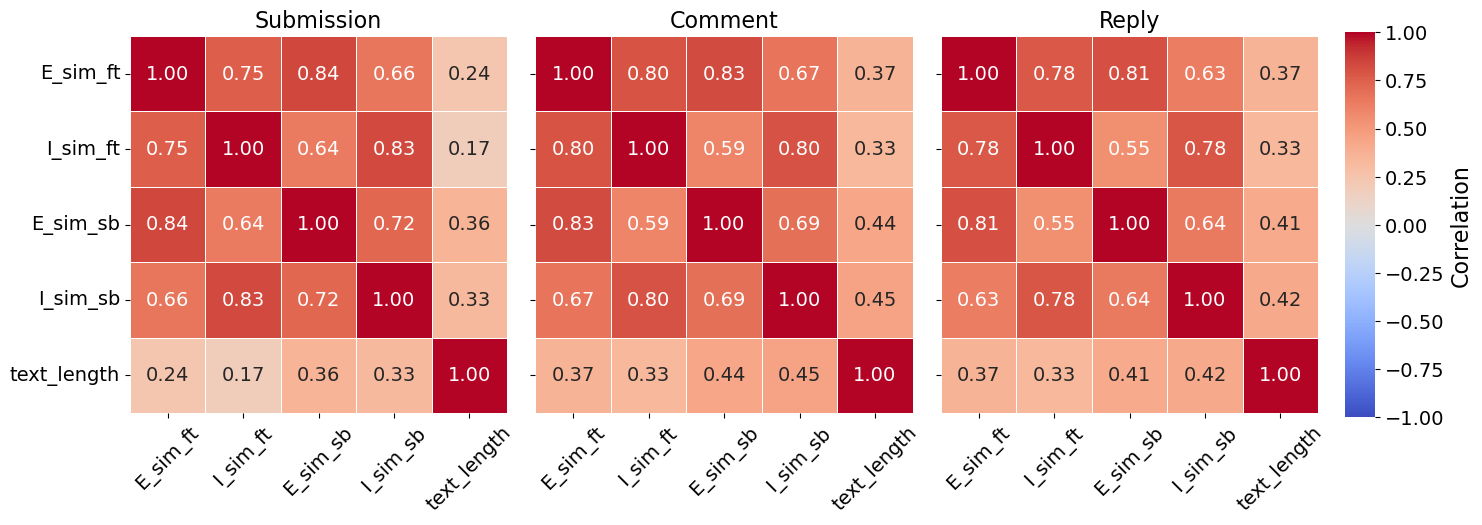

In [56]:
plot_multiple_corr_matrices(df_clipped, text_types=['submission', 'parent', 'child'], save_path='Length_Correction_Plots/combined_correlation_matrices_clipped_SM.pdf')


/tmp/ipykernel_1242/2820141185.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


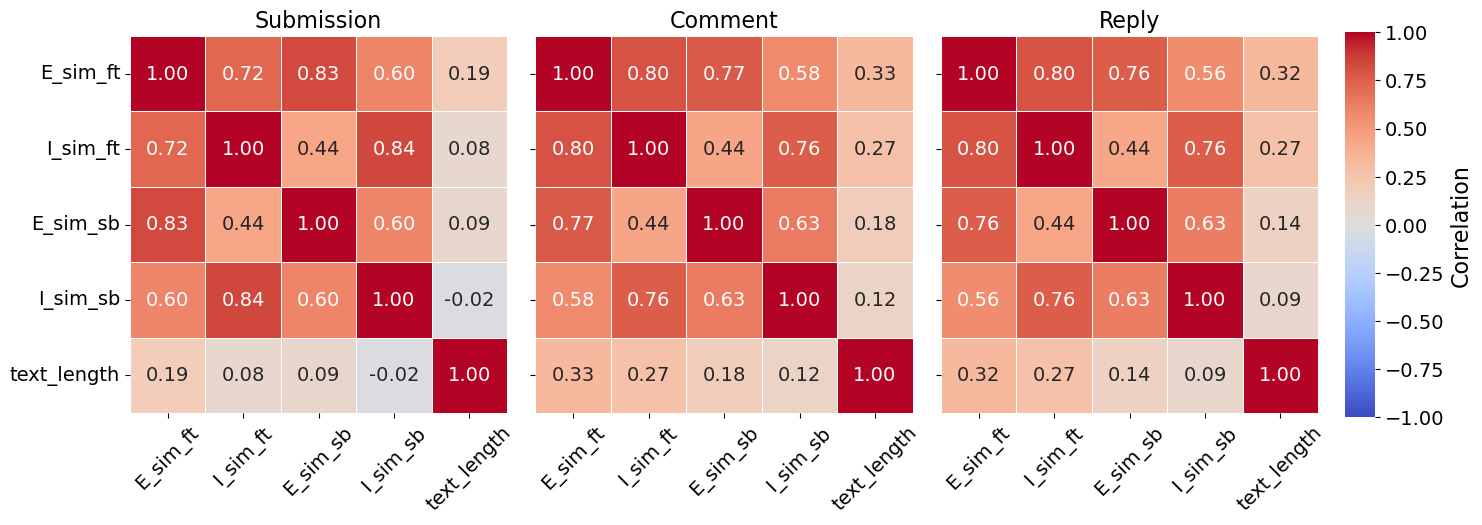

In [49]:
# SM with self and fine tuned
plot_multiple_corr_matrices(df_non_clipped, text_types=['submission', 'parent', 'child'], save_path='Length_Correction_Plots/combined_correlation_matrices_non_clipped_SM.pdf')


/tmp/ipykernel_1242/3503000226.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


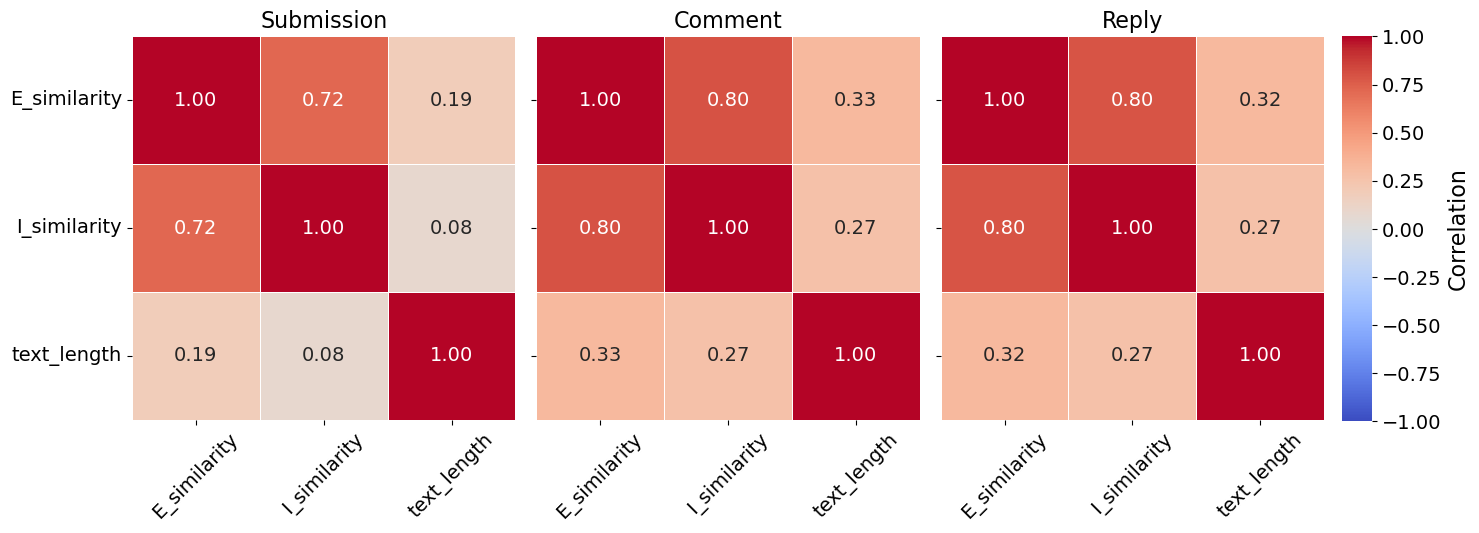

In [47]:
# paper - just finetuned

def plot_multiple_corr_matrices_paper(df, text_types, save_path='combined_correlation_matrices.pdf'):
    label_fontsize = 16
    tick_fontsize = 14
    title_fontsize = 18
    facet_title_fontsize = 16

    fig, axes = plt.subplots(1, len(text_types), figsize=(15, 5), sharey=True)

    base_cols = [f'finetuned_{{}}_E', f'finetuned_{{}}_I',
                 f'self_{{}}_E', f'self_{{}}_I',
                 f'{{}}_len']
    common_labels = ['finetuned_E', 'finetuned_I', 
                     #'self_E', 'self_I', 
                     'len']

    label_dict = {
    'finetuned_E': 'E_sim_ft',
    'finetuned_I': 'I_sim_ft',
    #'self_E': 'E_sim_sb',
    #'self_I': 'I_sim_sb',
    'len': 'text_length'
}
    
    id_map = {'submission': 'submission_id', 'parent': 'msg_id_parent', 'child': 'msg_id_child'}
    header = {"submission" : 'Submission', "parent" : "Comment", "child" : "Reply"}

    all_corrs = []
    for text_type in text_types:
        cols = [col.format(text_type) for col in base_cols]
        dedup_id_col = id_map[text_type]

        df_dedup = df.drop_duplicates(subset=dedup_id_col)
        df_sub = df_dedup[cols].copy()
        df_sub.columns = [label_dict[label] for label in common_labels]

        corr = df_sub.corr()
        all_corrs.append(corr)

    global_min = min(c.min().min() for c in all_corrs)
    global_max = max(c.max().max() for c in all_corrs)
    max_abs = max(abs(global_min), abs(global_max))

    for i, (text_type, corr) in enumerate(zip(text_types, all_corrs)):
        hm = sns.heatmap(
            corr,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            vmin=-max_abs, vmax=max_abs,
            ax=axes[i],
            cbar=False,
            square=True,
            linewidths=0.5,
            annot_kws={"size": tick_fontsize}
        )
        axes[i].set_title(f"{header[text_type]}", fontsize=facet_title_fontsize)
        axes[i].tick_params(axis='x', rotation=45, labelsize=tick_fontsize)
        axes[i].tick_params(axis='y', rotation=0, labelsize=tick_fontsize)

    # Colorbar
    cbar_ax = fig.add_axes([0.90, 0.19, 0.02, 0.77])
    norm = plt.Normalize(vmin=-max_abs, vmax=max_abs)
    sm = cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.outline.set_visible(False)
    cbar.ax.set_ylabel("Correlation", fontsize=label_fontsize)
    cbar.ax.tick_params(labelsize=tick_fontsize)

    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.show()



plot_multiple_corr_matrices_paper(df_non_clipped, text_types=['submission', 'parent', 'child'], save_path='Length_Correction_Plots/combined_correlation_matrices_non_clipped.pdf')


In [22]:

def pearson_with_ci(df, model, text_type, concept, confidence=0.95):

    id_map = {'submission': 'submission_id', 'parent': 'msg_id_parent', 'child': 'msg_id_child'}
    del_dup = id_map[text_type]
    df_dedup = df.drop_duplicates(subset=del_dup)

    
    x = np.asarray(df_dedup[f'{text_type}_len'])
    y = np.asarray(df_dedup[f'{model}_{text_type}_{concept}'])
    mask = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
    
    x, y = x[mask], y[mask]

    if len(x) < 4:  
        return np.nan, np.nan, (np.nan, np.nan)

    result = pearsonr(x, y)
    ci = result.confidence_interval(confidence_level=confidence)

    return result.statistic, result.pvalue, (ci.low, ci.high)


In [57]:
for text_type in ["submission", "parent", "child"]:
    for model in ["finetuned", "self"]:
        for concept in ["E", "I"]:
            r, p, (ci_lo, ci_hi) = pearson_with_ci(df_clipped, model, text_type, concept)
            print(f"{text_type}, {model}, {concept}: r = {r:.4f}, p = {p:.4f}, 95% CI = [{ci_lo:.4f}, {ci_hi:.4f}]")


submission, finetuned, E: r = 0.2393, p = 0.0000, 95% CI = [0.2335, 0.2451]
submission, finetuned, I: r = 0.1735, p = 0.0000, 95% CI = [0.1675, 0.1795]
submission, self, E: r = 0.3588, p = 0.0000, 95% CI = [0.3534, 0.3642]
submission, self, I: r = 0.3255, p = 0.0000, 95% CI = [0.3199, 0.3310]
parent, finetuned, E: r = 0.3655, p = 0.0000, 95% CI = [0.3643, 0.3667]
parent, finetuned, I: r = 0.3283, p = 0.0000, 95% CI = [0.3271, 0.3296]
parent, self, E: r = 0.4361, p = 0.0000, 95% CI = [0.4350, 0.4373]
parent, self, I: r = 0.4502, p = 0.0000, 95% CI = [0.4491, 0.4514]
child, finetuned, E: r = 0.3663, p = 0.0000, 95% CI = [0.3655, 0.3670]
child, finetuned, I: r = 0.3348, p = 0.0000, 95% CI = [0.3340, 0.3356]
child, self, E: r = 0.4133, p = 0.0000, 95% CI = [0.4126, 0.4141]
child, self, I: r = 0.4201, p = 0.0000, 95% CI = [0.4194, 0.4209]


In [24]:
for text_type in ["submission", "parent", "child"]:
    for model in ["finetuned", "self"]:
        for concept in ["E", "I"]:
            r, p, (ci_lo, ci_hi) = pearson_with_ci(df_non_clipped, model, text_type, concept)
            print(f"{text_type}, {model}, {concept}: r = {r:.4f}, p = {p:.4f}, 95% CI = [{ci_lo:.4f}, {ci_hi:.4f}]")


submission, finetuned, E: r = 0.1865, p = 0.0000, 95% CI = [0.1806, 0.1924]
submission, finetuned, I: r = 0.0802, p = 0.0000, 95% CI = [0.0741, 0.0864]
submission, self, E: r = 0.0887, p = 0.0000, 95% CI = [0.0826, 0.0948]
submission, self, I: r = -0.0171, p = 0.0000, 95% CI = [-0.0233, -0.0110]
parent, finetuned, E: r = 0.3278, p = 0.0000, 95% CI = [0.3265, 0.3290]
parent, finetuned, I: r = 0.2672, p = 0.0000, 95% CI = [0.2659, 0.2685]
parent, self, E: r = 0.1761, p = 0.0000, 95% CI = [0.1748, 0.1775]
parent, self, I: r = 0.1248, p = 0.0000, 95% CI = [0.1234, 0.1261]
child, finetuned, E: r = 0.3222, p = 0.0000, 95% CI = [0.3214, 0.3230]
child, finetuned, I: r = 0.2729, p = 0.0000, 95% CI = [0.2721, 0.2737]
child, self, E: r = 0.1368, p = 0.0000, 95% CI = [0.1359, 0.1377]
child, self, I: r = 0.0920, p = 0.0000, 95% CI = [0.0911, 0.0928]


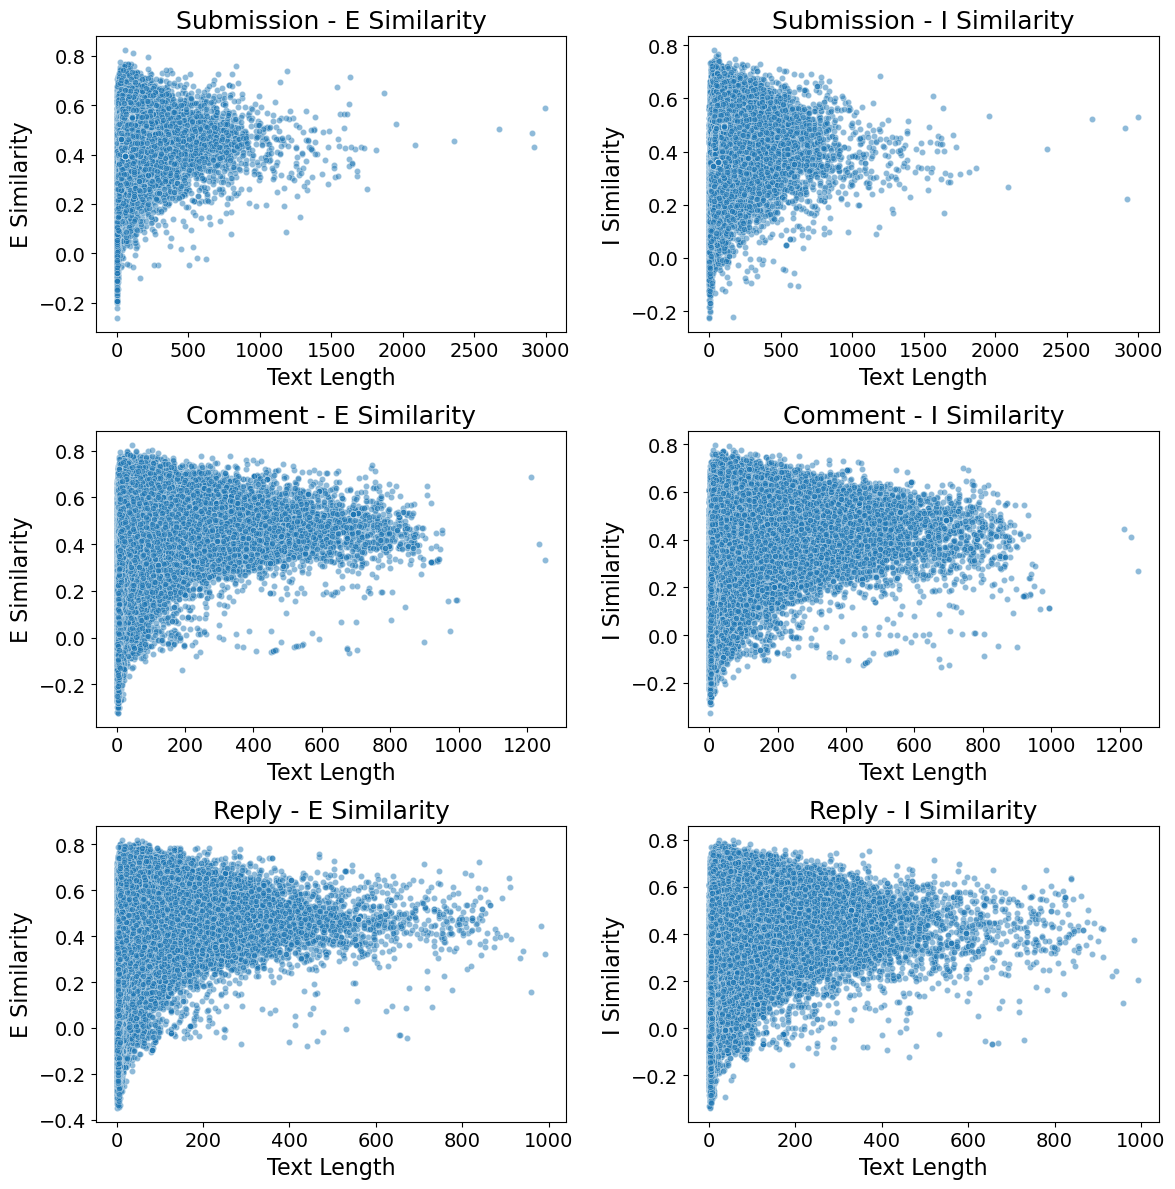

In [9]:

def plot_length_vs_similarity(df, model, file_path, text_types=['submission', 'parent', 'child'] ):
    fig, axes = plt.subplots(
        nrows=3, ncols=2, figsize=(12, 12), sharex=False, sharey=False
    )

    similarity_types = ['E', 'I']
    id_map = {'submission': 'submission_id', 'parent': 'msg_id_parent', 'child': 'msg_id_child'}
    

    header = {"submission" : 'Submission',
             "parent" : "Comment",
             "child" : "Reply"}

    for row_idx, text_type in enumerate(text_types):
        for col_idx, sim_type in enumerate(similarity_types):
            
            dedup_id_col = id_map[text_type]

            # Drop duplicates for current text type
            df_dedup = df.drop_duplicates(subset=dedup_id_col)
    

            ax = axes[row_idx, col_idx]
            length_col = f'{text_type}_len'
            score_col = f'{model}_{text_type}_{sim_type}'

            df

            sns.scatterplot(
                data=df_dedup,
                x=length_col,
                y=score_col,
                alpha=0.5,
                s=20,
                ax=ax
            )

            ax.set_title(f"{header[text_type]} - {sim_type} Similarity", fontsize=18)
            ax.set_xlabel("Text Length", fontsize = 16)
            ax.set_ylabel(f"{sim_type} Similarity", fontsize = 16)
            ax.tick_params(axis='both', labelsize=14)

    plt.tight_layout()
    #plt.suptitle("Text Length vs. Similarity Scores", fontsize=16, y=1.02)
    plt.savefig(file_path)
    plt.show()

plot_length_vs_similarity(df_non_clipped, model = "finetuned", file_path = "Length_Correction_Plots/non_clipped_scatter_len_similarity_finetuned.png")



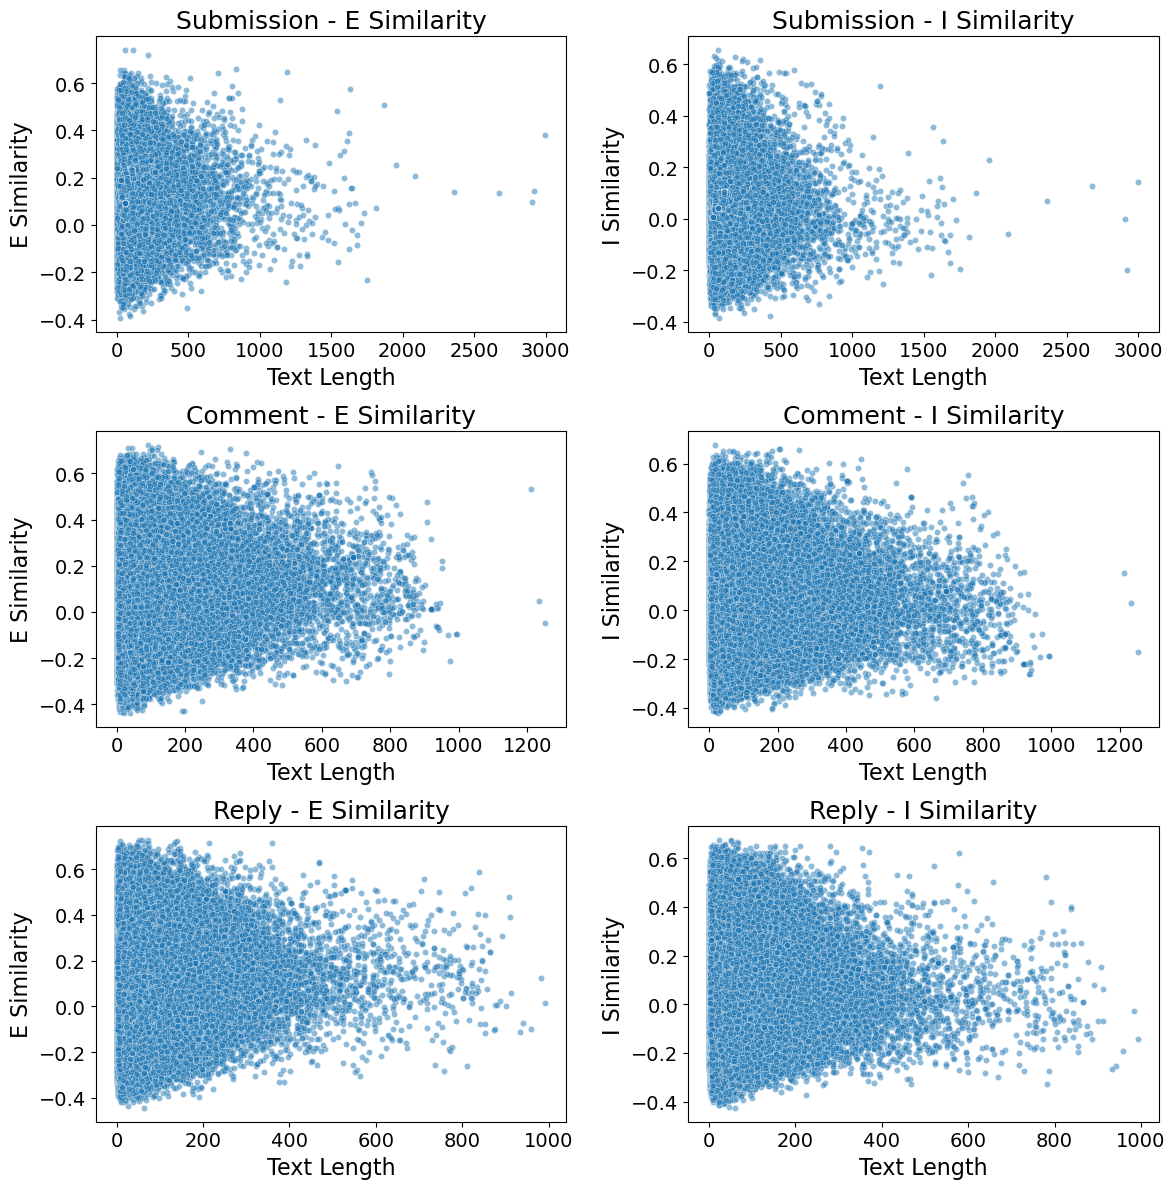

In [10]:
plot_length_vs_similarity(df_non_clipped, model = "self", file_path = "Length_Correction_Plots/non_clipped_scatter_len_similarity_self.png")

In [ ]:
plot_length_vs_similarity(df_clipped, model = "finetuned", file_path = "Length_Correction_Plots/scatter_len_similarity_finetuned.png")

In [ ]:
plot_length_vs_similarity(df_clipped, model = "self", file_path = "Length_Correction_Plots/scatter_len_similarity_finetuned.png")

In [11]:
# funtion for length binning

def length_bin_scores(df, model, num_bins = 10):
    
    parents = df[['msg_id_parent', 'parent_len',
                  f'{model}_parent_E', f'{model}_parent_I']].drop_duplicates(subset = 'msg_id_parent').reset_index(drop = True)
    
    parents = parents.rename(columns = {'msg_id_parent': 'id', 'parent_len': 'len' ,
                                        f'{model}_parent_E' : f'{model}_E_score', f'{model}_parent_I' : f'{model}_I_score'})
    parents['type'] = 'parent'

    
    # ---------------------------------------------------
    children = df[['msg_id_child', 'child_len',
                   f'{model}_child_E', f'{model}_child_I']].drop_duplicates(subset = 'msg_id_child').reset_index(drop = True)
    
    children = children.rename(columns = {'msg_id_child': 'id', 'child_len': 'len' ,
                                          f'{model}_child_E' : f'{model}_E_score', f'{model}_child_I' : f'{model}_I_score'})
    children['type'] = 'child'

    
    # ---------------------------------------------------
    submissions = df[['submission_id', 'submission_len',
                      f'{model}_submission_E', f'{model}_submission_I']].drop_duplicates(subset = 'submission_id').reset_index(drop = True)
    
    submissions = submissions.rename(columns = {'submission_id': 'id', 'submission_len': 'len' ,
                                                f'{model}_submission_E' : f'{model}_E_score', f'{model}_submission_I' : f'{model}_I_score'})
    submissions['type'] = 'submission'
    
    
    
    #texts_unqiue = pd.concat([parents, children, submissions]).reset_index(drop = True)

    # equal depth binning 
    children[f"{model}_length_bin"] = pd.qcut(children["len"], q=num_bins, labels=False, duplicates = 'drop')
    parents[f"{model}_length_bin"] = pd.qcut(parents["len"], q=num_bins, labels=False, duplicates = 'drop')
    submissions[f"{model}_length_bin"] = pd.qcut(submissions["len"], q=num_bins, labels=False, duplicates = "drop")

    
    def bin_adjust_scores(data, model):
    
        data[f"{model}_E_norm"] = data.groupby(f"{model}_length_bin")[f"{model}_E_score"].transform(lambda x: (x - x.mean()))
        data[f"{model}_I_norm"] = data.groupby(f"{model}_length_bin")[f"{model}_I_score"].transform(lambda x: (x - x.mean()))

        return data
        
    
    parents = bin_adjust_scores(parents, model)
    children = bin_adjust_scores(children, model)
    submissions = bin_adjust_scores(submissions, model)

    #print(parents[:10])

    # map bins, bin means and normalized scores back to debagree df 

    df = df.merge(children[['id', f"{model}_length_bin", f'{model}_E_norm', f'{model}_I_norm']], left_on='msg_id_child', right_on='id', how='left')
    
    df = df.rename(columns={f'{model}_length_bin': f'{model}_length_bin_child',
                            f'{model}_E_norm': f'{model}_child_E_norm', 
                            f'{model}_I_norm': f'{model}_child_I_norm'})
    
    df = df.drop(columns=['id'])
    
    
    df = df.merge(parents[['id', f'{model}_length_bin', f'{model}_E_norm', f'{model}_I_norm']], left_on='msg_id_parent', right_on='id', how='left')
    
    df = df.rename(columns={f'{model}_length_bin': f'{model}_length_bin_parent',
                           f'{model}_E_norm': f'{model}_parent_E_norm', 
                           f'{model}_I_norm': f'{model}_parent_I_norm',                                    
                           })
    df = df.drop(columns=['id'])
    
    
    
    df = df.merge(submissions[['id', f'{model}_length_bin', f'{model}_E_norm', f'{model}_I_norm']], left_on='submission_id', right_on='id', how='left')
    
    df = df.rename(columns={f'{model}_length_bin': f'{model}_length_bin_submission',
                            f'{model}_E_norm': f'{model}_submission_E_norm', 
                            f'{model}_I_norm': f'{model}_submission_I_norm',                                  
                            })
    
    df = df.drop(columns=['id'])
    
    return df


### **Plots to determine nr. of bins**

In [12]:
bin_range = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
correlations_E = {"submissions": [], "comments": [], "replies": []}
correlations_I = {"submissions": [], "comments": [], "replies": []}

model = "finetuned"

for bins in bin_range:
    df_binned = length_bin_scores(df_clipped_no_na.copy(), model, num_bins=bins)

    for text_type, label in zip(['submission', 'parent', 'child'], ['submissions', 'comments', 'replies']):
        corr_E, _ = pearsonr(df_binned[f'{text_type}_len'], df_binned[f'{model}_{text_type}_E_norm'])
        correlations_E[label].append(corr_E)

        corr_I, _ = pearsonr(df_binned[f'{text_type}_len'], df_binned[f'{model}_{text_type}_I_norm'])
        correlations_I[label].append(corr_I)


# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True)

titles = ['Submissions', 'Comments', 'Replies']
keys = ['submissions', 'comments', 'replies']

# Row 0: E Similarity
for i, key in enumerate(keys):
    sns.lineplot(x=bin_range, y=correlations_E[key], ax=axes[0, i])
    axes[0, i].set_title(f'{titles[i]} - E Similarity', fontsize = 14)
    axes[0, i].set_ylabel('Correlation', fontsize = 12)
    axes[0, i].axhline(0, color='gray', linestyle='--')
    axes[0, i].grid(True)

# Row 1: I Similarity
for i, key in enumerate(keys):
    sns.lineplot(x=bin_range, y=correlations_I[key], ax=axes[1, i])
    axes[1, i].set_title(f'{titles[i]} - I Similarity', fontsize = 14)
    axes[1, i].set_ylabel('Correlation', fontsize = 12)
    axes[1, i].axhline(0, color='gray', linestyle='--')
    axes[1, i].grid(True)

axes[1, 1].set_xlabel('Number of Bins', fontsize = 12)

plt.suptitle("Correlation of Text Length and Normalized Similarity Scores", fontsize=16)
plt.tight_layout()
plt.savefig("Length_Correction_Plots/Correlation_TextLength_per_NrBin_finetuned.pdf")
plt.show()


NameError: name 'df_clipped_no_na' is not defined

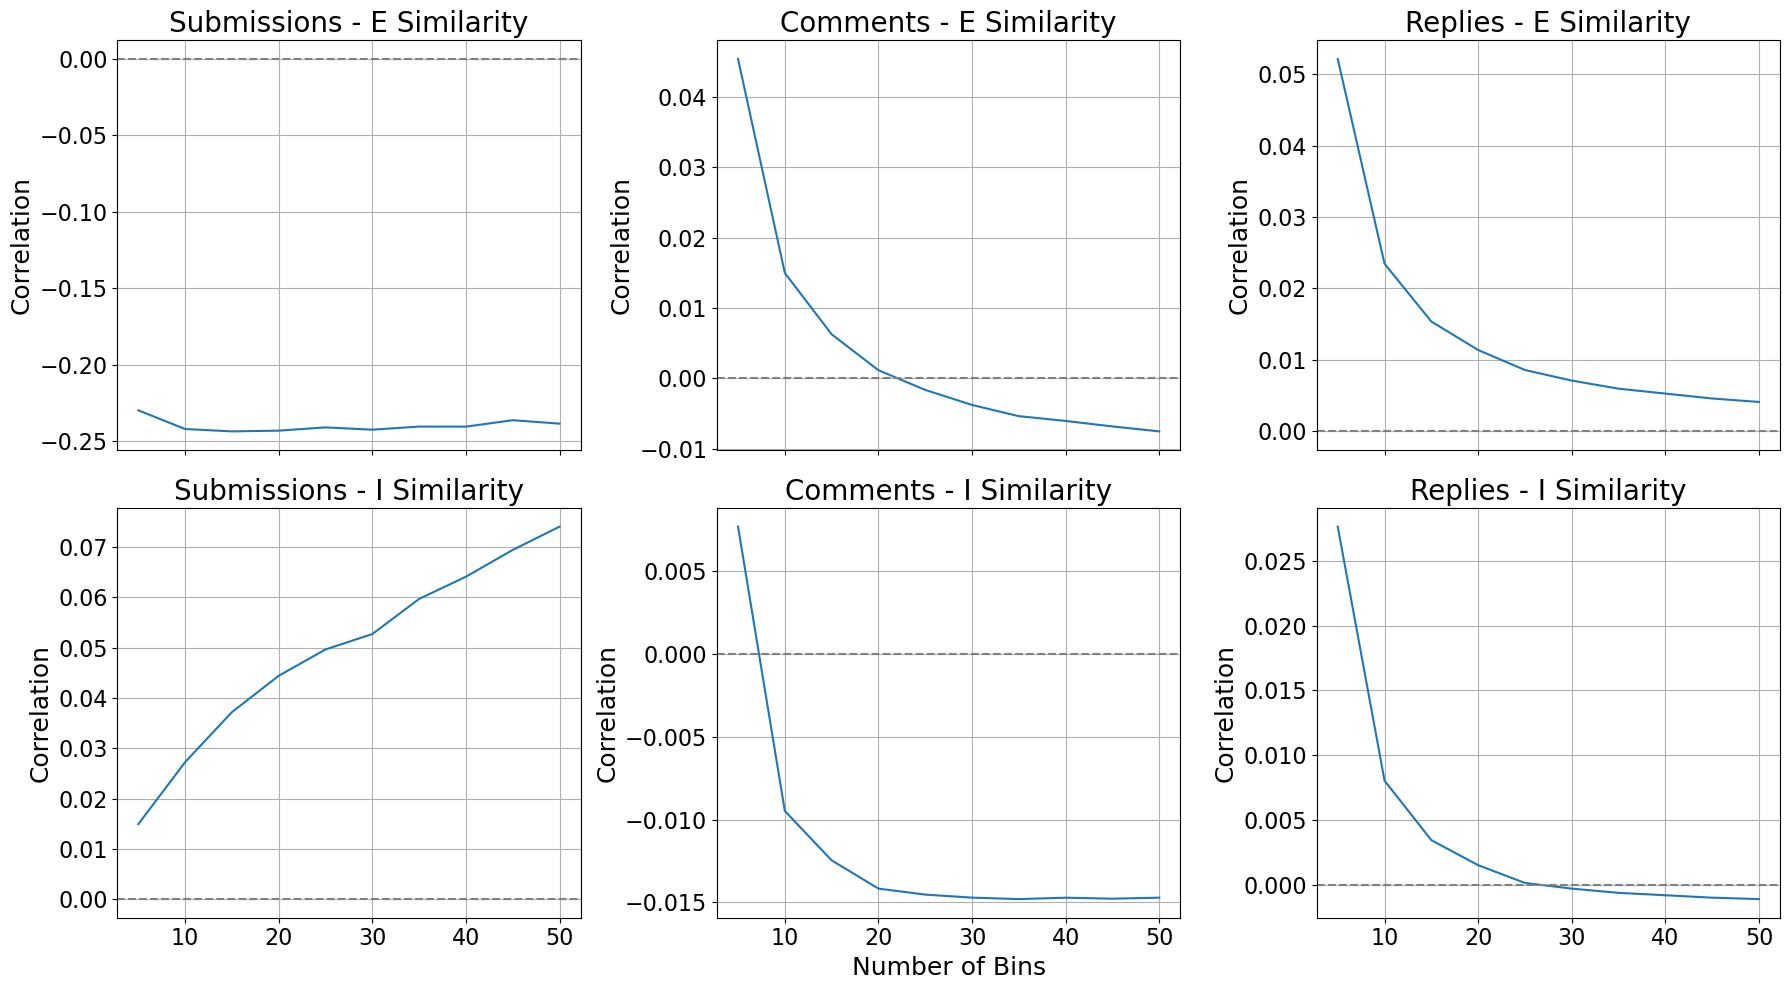

In [13]:
bin_range = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
correlations_E = {"submissions": [], "comments": [], "replies": []}
correlations_I = {"submissions": [], "comments": [], "replies": []}

model = "finetuned"

for bins in bin_range:
    df_binned = length_bin_scores(df_non_clipped_no_na.copy(), model, num_bins=bins)

    for text_type, label in zip(['submission', 'parent', 'child'], ['submissions', 'comments', 'replies']):
        corr_E, _ = pearsonr(df_binned[f'{text_type}_len'], df_binned[f'{model}_{text_type}_E_norm'])
        correlations_E[label].append(corr_E)

        corr_I, _ = pearsonr(df_binned[f'{text_type}_len'], df_binned[f'{model}_{text_type}_I_norm'])
        correlations_I[label].append(corr_I)


# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True)

titles = ['Submissions', 'Comments', 'Replies']
keys = ['submissions', 'comments', 'replies']

# Row 0: E Similarity
for i, key in enumerate(keys):
    sns.lineplot(x=bin_range, y=correlations_E[key], ax=axes[0, i])
    axes[0, i].set_title(f'{titles[i]} - E Similarity', fontsize = 20)
    axes[0, i].set_ylabel('Correlation', fontsize = 18)
    axes[0, i].axhline(0, color='gray', linestyle='--')
    axes[0, i].grid(True)
    axes[0, i].tick_params(axis='both', labelsize=16)

# Row 1: I Similarity
for i, key in enumerate(keys):
    sns.lineplot(x=bin_range, y=correlations_I[key], ax=axes[1, i])
    axes[1, i].set_title(f'{titles[i]} - I Similarity', fontsize = 20)
    axes[1, i].set_ylabel('Correlation', fontsize = 18)
    axes[1, i].axhline(0, color='gray', linestyle='--')
    axes[1, i].grid(True)
    axes[1, i].tick_params(axis='both', labelsize=16)

axes[1, 1].set_xlabel('Number of Bins', fontsize = 18)

#plt.suptitle("Correlation of Text Length and Normalized Similarity Scores", fontsize=16)
plt.tight_layout()
plt.savefig("Length_Correction_Plots/Correlation_TextLength_per_NrBin_finetuned_non_clipped.pdf")
plt.show()


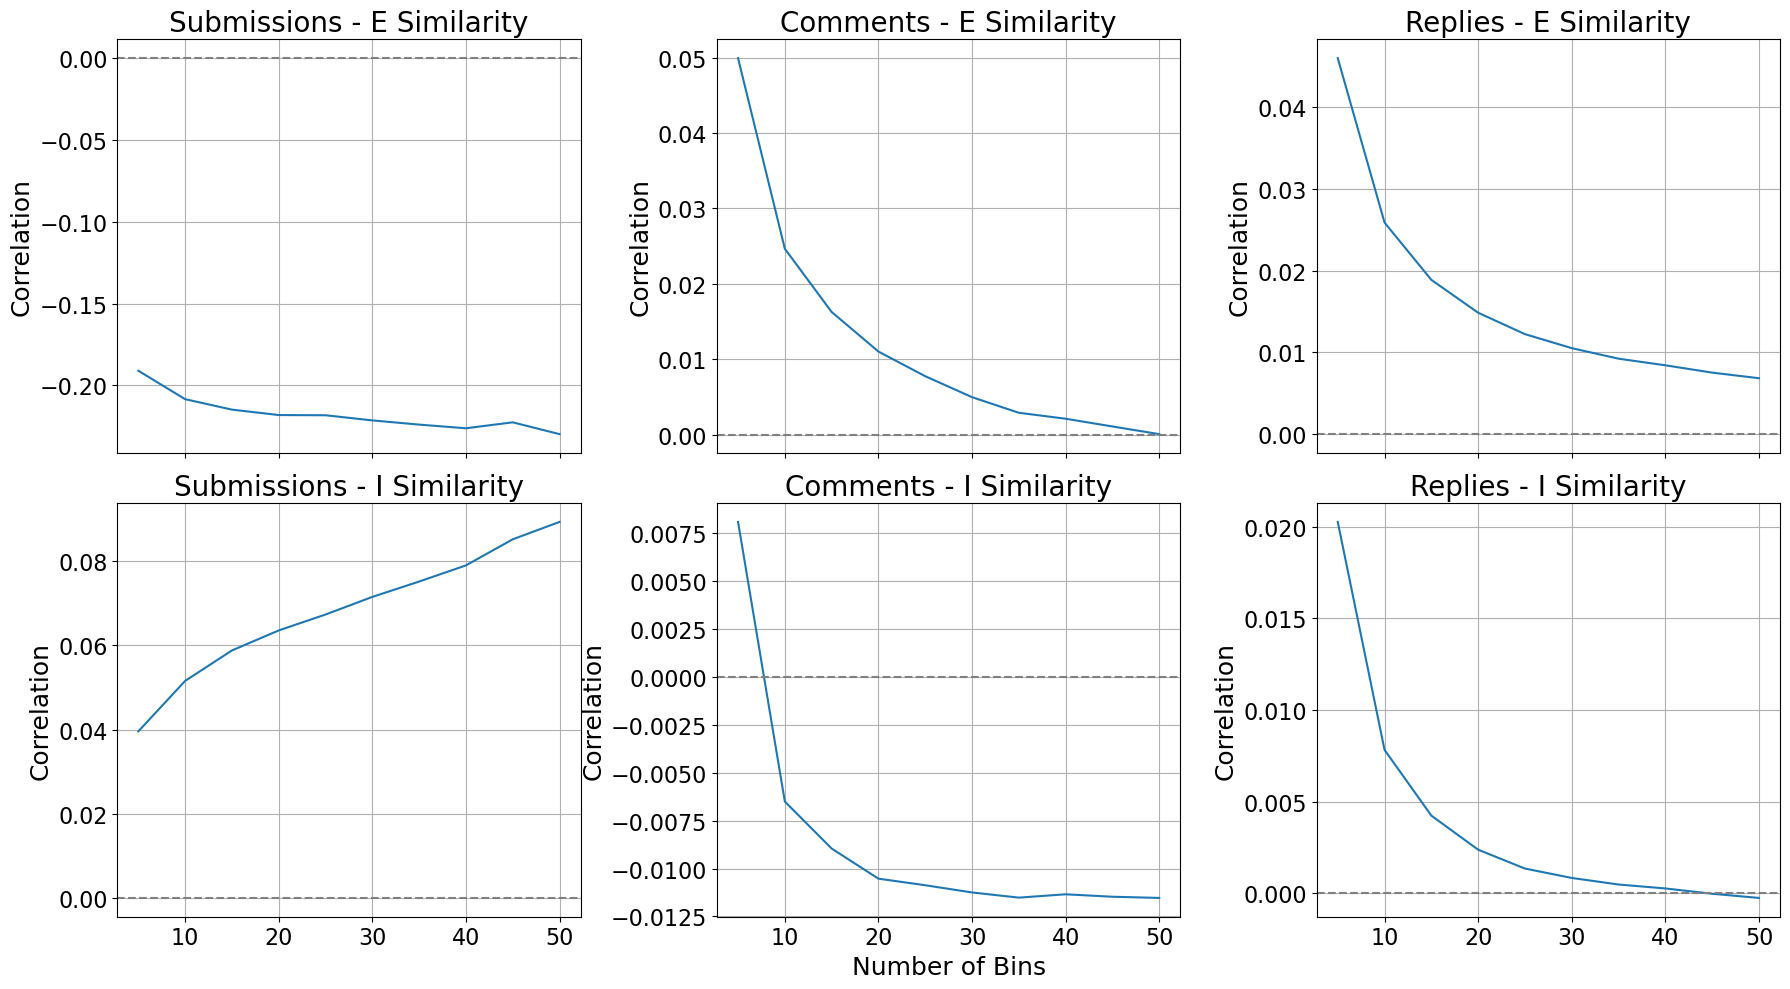

In [16]:
bin_range = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
correlations_E = {"submissions": [], "comments": [], "replies": []}
correlations_I = {"submissions": [], "comments": [], "replies": []}

model = "self"

for bins in bin_range:
    df_binned = length_bin_scores(df_non_clipped_no_na.copy(), model, num_bins=bins)

    for text_type, label in zip(['submission', 'parent', 'child'], ['submissions', 'comments', 'replies']):
        corr_E, _ = pearsonr(df_binned[f'{text_type}_len'], df_binned[f'{model}_{text_type}_E_norm'])
        correlations_E[label].append(corr_E)

        corr_I, _ = pearsonr(df_binned[f'{text_type}_len'], df_binned[f'{model}_{text_type}_I_norm'])
        correlations_I[label].append(corr_I)

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True)

titles = ['Submissions', 'Comments', 'Replies']
keys = ['submissions', 'comments', 'replies']

# Row 0: E Similarity
for i, key in enumerate(keys):
    sns.lineplot(x=bin_range, y=correlations_E[key], ax=axes[0, i])
    axes[0, i].set_title(f'{titles[i]} - E Similarity', fontsize = 20)
    axes[0, i].set_ylabel('Correlation',  fontsize = 18)
    axes[0, i].axhline(0, color='gray', linestyle='--')
    axes[0, i].grid(True)
    axes[0, i].tick_params(axis='both', labelsize=16)

# Row 1: I Similarity
for i, key in enumerate(keys):
    sns.lineplot(x=bin_range, y=correlations_I[key], ax=axes[1, i])
    axes[1, i].set_title(f'{titles[i]} - I Similarity', fontsize = 20)
    axes[1, i].set_ylabel('Correlation', fontsize = 18)
    axes[1, i].axhline(0, color='gray', linestyle='--')
    axes[1, i].grid(True)
    axes[1, i].tick_params(axis='both', labelsize=16)

axes[1, 1].set_xlabel('Number of Bins', fontsize = 18)

#plt.suptitle("Correlation of Text Length and Normalized Similarity Scores", fontsize=16)
plt.tight_layout()
plt.savefig("Length_Correction_Plots/Correlation_TextLength_per_NrBin_self_non_clipped.pdf")
plt.show()


In [15]:
bin_range = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
correlations_E = {"submissions": [], "comments": [], "replies": []}
correlations_I = {"submissions": [], "comments": [], "replies": []}

model = "self"

for bins in bin_range:
    df_binned = length_bin_scores(df_clipped_no_na.copy(), model, num_bins=bins)

    for text_type, label in zip(['submission', 'parent', 'child'], ['submissions', 'comments', 'replies']):
        corr_E, _ = pearsonr(df_binned[f'{text_type}_len'], df_binned[f'{model}_{text_type}_E_norm'])
        correlations_E[label].append(corr_E)

        corr_I, _ = pearsonr(df_binned[f'{text_type}_len'], df_binned[f'{model}_{text_type}_I_norm'])
        correlations_I[label].append(corr_I)

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True)

titles = ['Submissions', 'Comments', 'Replies']
keys = ['submissions', 'comments', 'replies']

# Row 0: E Similarity
for i, key in enumerate(keys):
    sns.lineplot(x=bin_range, y=correlations_E[key], ax=axes[0, i])
    axes[0, i].set_title(f'{titles[i]} - E Similarity', fontsize = 20)
    axes[0, i].set_ylabel('Correlation',  fontsize = 18)
    axes[0, i].axhline(0, color='gray', linestyle='--')
    axes[0, i].grid(True)
    axes[0, i].tick_params(axis='both', labelsize=16)

# Row 1: I Similarity
for i, key in enumerate(keys):
    sns.lineplot(x=bin_range, y=correlations_I[key], ax=axes[1, i])
    axes[1, i].set_title(f'{titles[i]} - I Similarity', fontsize = 20)
    axes[1, i].set_ylabel('Correlation', fontsize = 18)
    axes[1, i].axhline(0, color='gray', linestyle='--')
    axes[1, i].grid(True)
    axes[1, i].tick_params(axis='both', labelsize=16)

axes[1, 1].set_xlabel('Number of Bins', fontsize = 18)

plt.suptitle("Correlation of Text Length and Normalized Similarity Scores", fontsize=16)
plt.tight_layout()
plt.savefig("Length_Correction_Plots/Correlation_TextLength_per_NrBin_self.pdf")
plt.show()

NameError: name 'df_clipped_no_na' is not defined

In [47]:
def plot_bin_counts(df, model, num_bins, save = False, clipped = True):
    # Apply binning
    df_binned = length_bin_scores(df.copy(), model, num_bins=num_bins)

    # Define mapping from your internal naming
    bin_cols = {
        'submission': f'{model}_length_bin_submission',
        'comment': f'{model}_length_bin_parent',
        'reply': f'{model}_length_bin_child'
    }

    fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
    titles = ['Submissions', 'Comments', 'Replies']

    for i, (text_type, bin_col) in enumerate(bin_cols.items()):
        counts = df_binned[bin_col].value_counts().sort_index()
        axes[i].bar(counts.index.astype(str), counts.values)
        axes[i].set_title(f"{titles[i]}", fontsize = 28)
        axes[i].set_xlabel("Bin", fontsize = 24)
        if i == 0:
            axes[i].set_ylabel("Number of Samples", fontsize = 24)
        axes[i].grid(True)
        axes[i].tick_params(axis='both', labelsize=19)
        axes[i].yaxis.get_offset_text().set_fontsize(19)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')

        

    #plt.suptitle(f"Sample Counts per Bin (num_bins={num_bins})", fontsize=14)
    plt.tight_layout()
    if save == True:
        if clipped == True:
            plt.savefig(f"Length_Correction_Plots/Sample_Counts_per_Bin_{num_bins}_{model}.pdf")
        else:
            plt.savefig(f"Length_Correction_Plots/Sample_Counts_per_Bin_{num_bins}_{model}_non_clipped.pdf")
    plt.show()


In [18]:
plot_bin_counts(df_clipped_no_na, model="finetuned", num_bins=10, save = False, clipped = True)


NameError: name 'df_clipped_no_na' is not defined

$\to$ roughly 500.000 comments and replies per bin

$\to$ submissions skewed

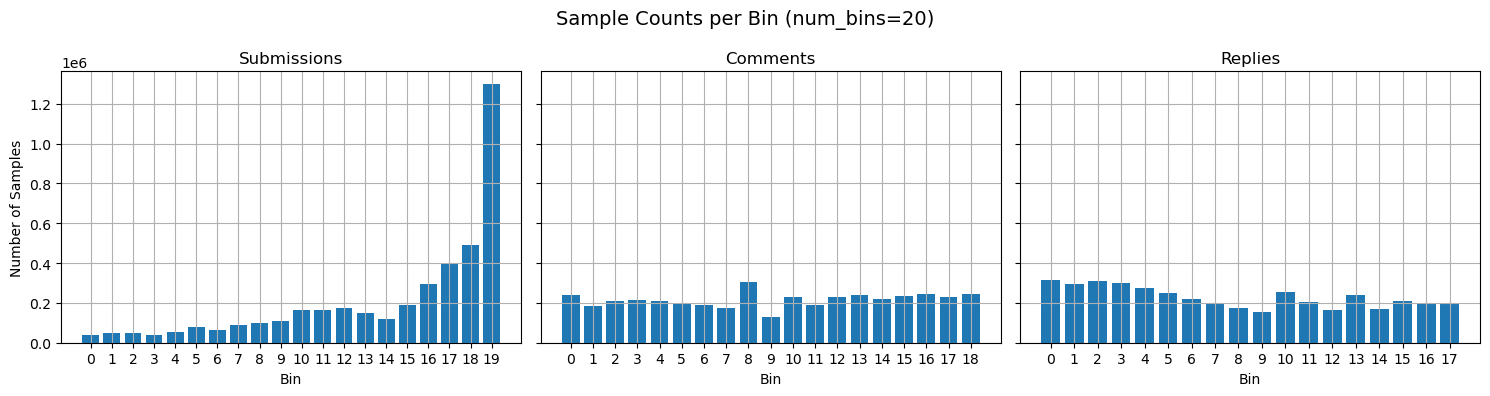

In [37]:
plot_bin_counts(df_clipped_no_na, model="finetuned", num_bins=20, save = True, clipped = True)


$\to$ roughly 200.000 comments and replies per bin

$\to$ submissions skewed

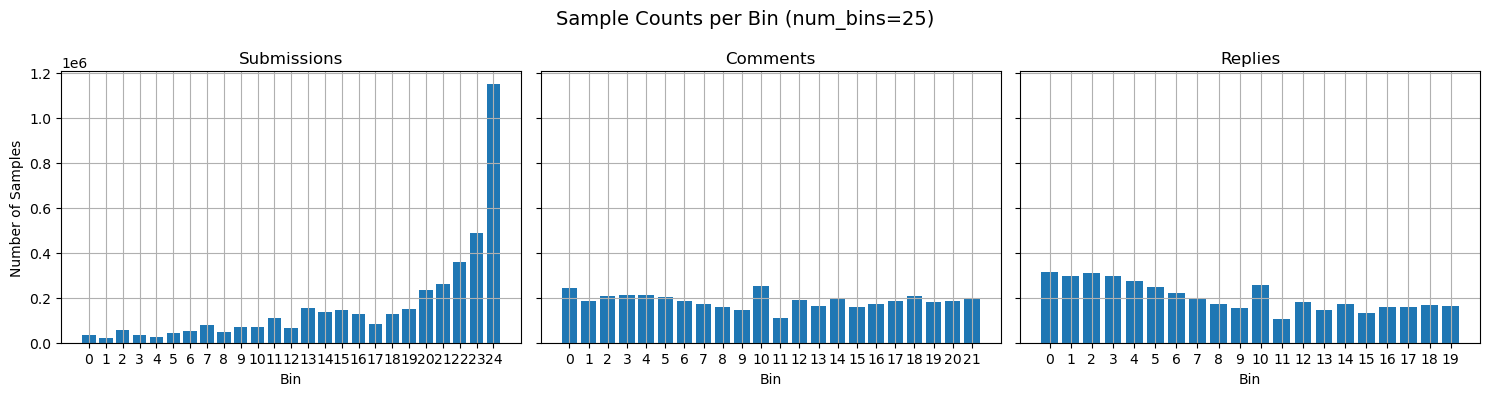

In [38]:
plot_bin_counts(df_clipped_no_na, model="finetuned", num_bins=25, save = True, clipped = True)


$\to$ still, roughly 200.000 comments and replies per bin. Instable

$\to$ submissions very skewed

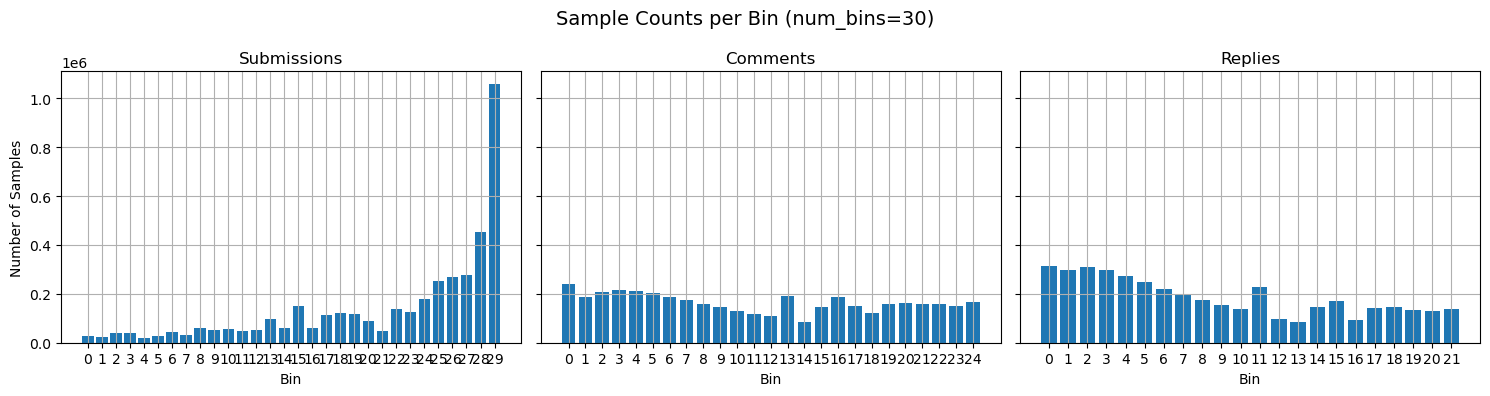

In [39]:
plot_bin_counts(df_clipped_no_na, model="finetuned", num_bins=30, save = True, clipped = True)


/tmp/ipykernel_1935/1881791117.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')
/tmp/ipykernel_1935/1881791117.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')
/tmp/ipykernel_1935/1881791117.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')


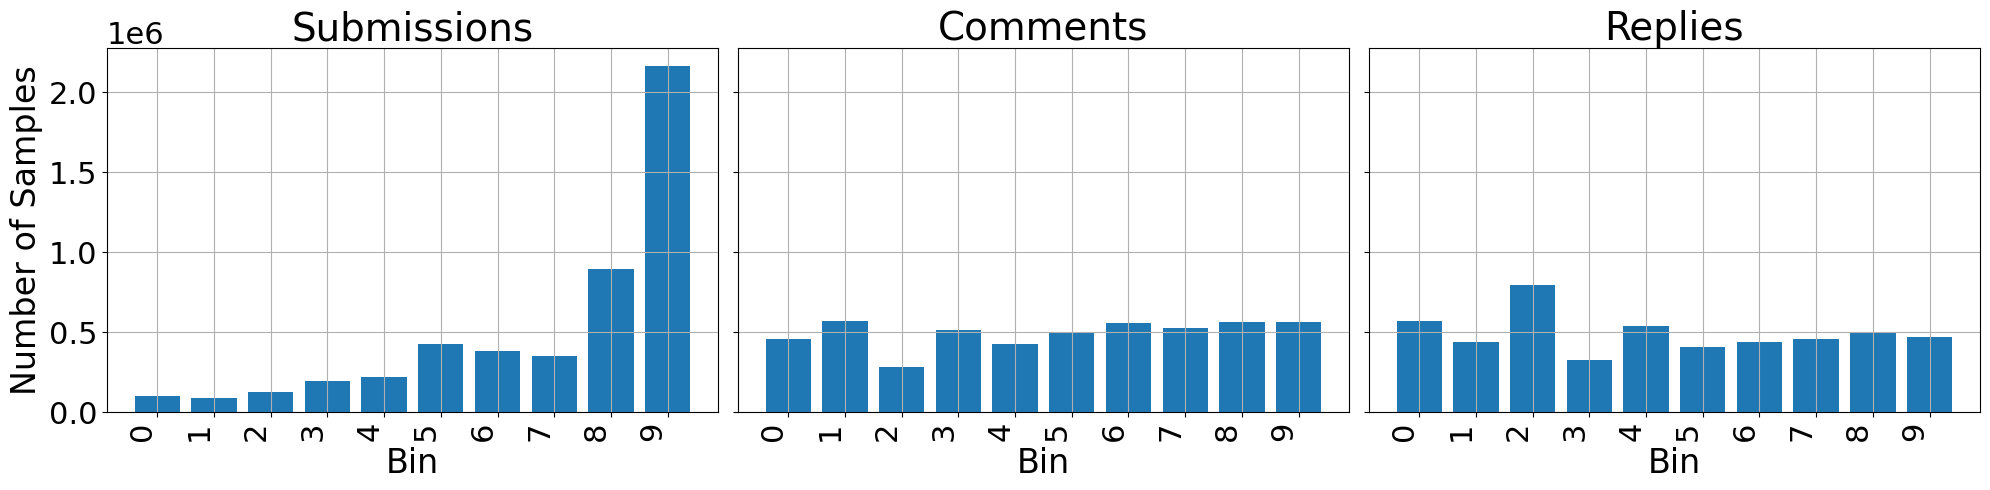

In [40]:
plot_bin_counts(df_non_clipped_no_na, model="finetuned", num_bins=10, save = False, clipped = False)


/tmp/ipykernel_1935/3311494894.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')
/tmp/ipykernel_1935/3311494894.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')
/tmp/ipykernel_1935/3311494894.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')


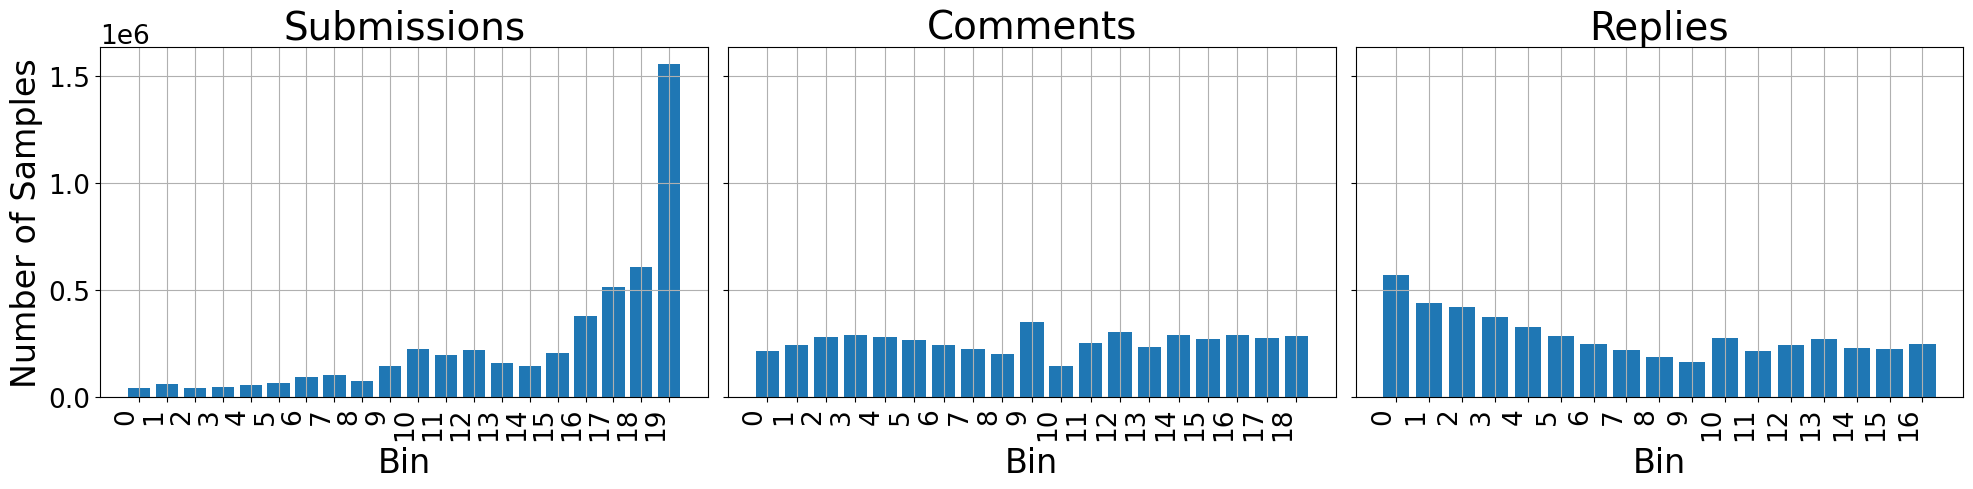

In [48]:
plot_bin_counts(df_non_clipped_no_na, model="finetuned", num_bins=20, save = True, clipped = False)


/tmp/ipykernel_1935/3311494894.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')
/tmp/ipykernel_1935/3311494894.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')
/tmp/ipykernel_1935/3311494894.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')


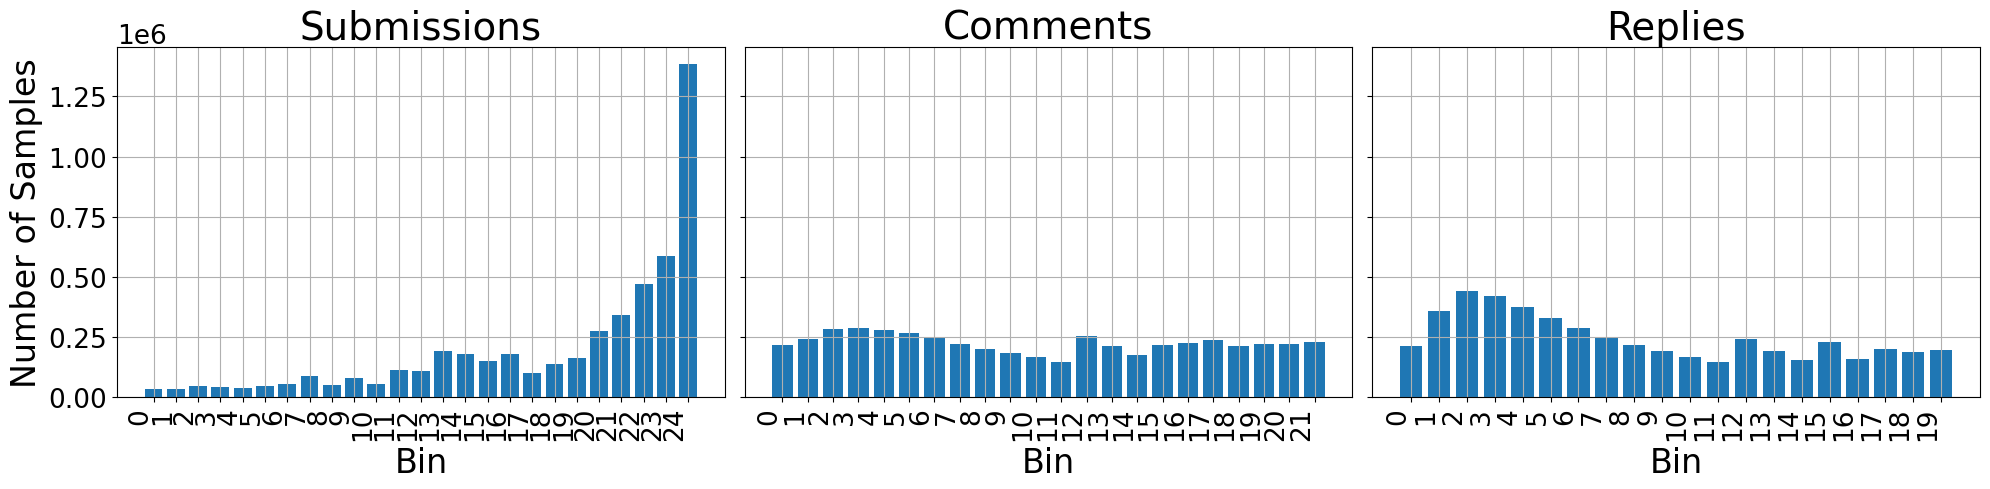

In [49]:
plot_bin_counts(df_non_clipped_no_na, model="finetuned", num_bins=25, save = True, clipped = False)


/tmp/ipykernel_1935/3311494894.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')
/tmp/ipykernel_1935/3311494894.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')
/tmp/ipykernel_1935/3311494894.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')


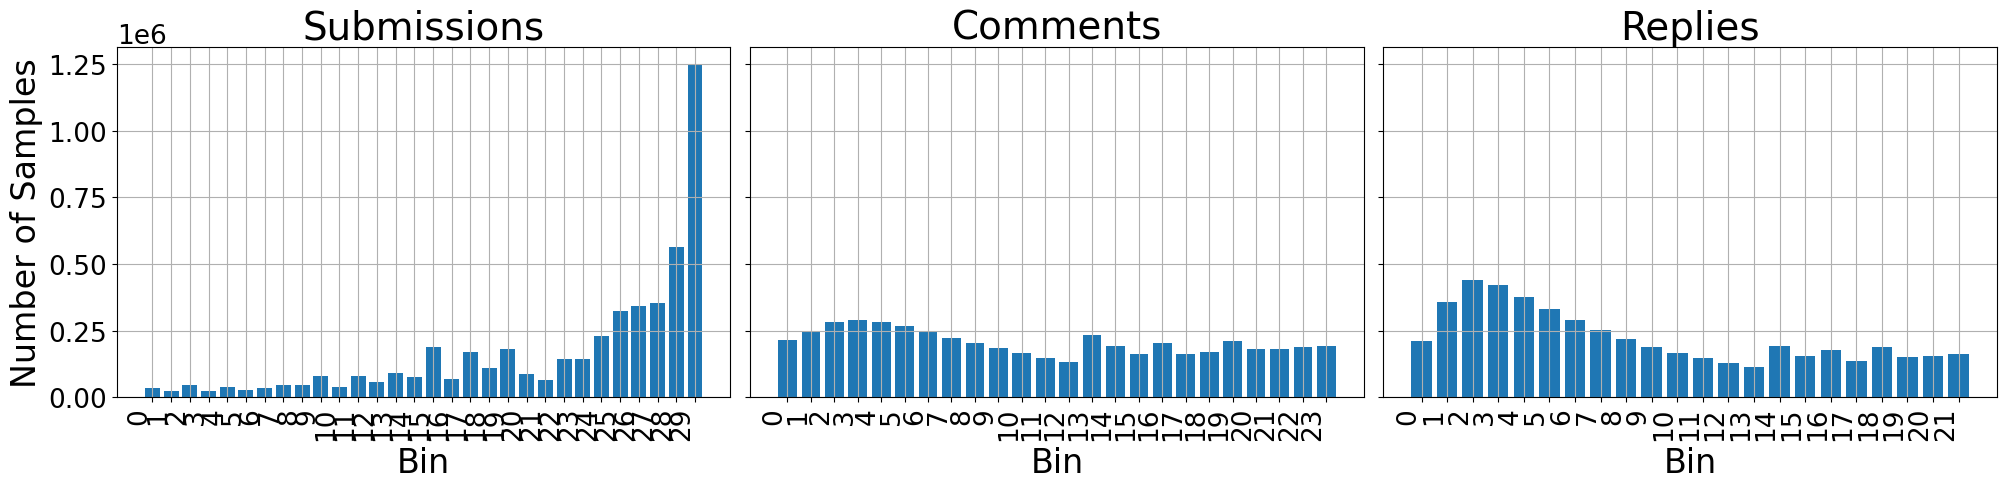

In [50]:
plot_bin_counts(df_non_clipped_no_na, model="finetuned", num_bins=30, save = True, clipped = False)


In [58]:
def plot_bin_midpoint_vs_similarity_all(df, model, num_bins=10, score_type='E', save = False, clipped = True):
    text_types = ['submission', 'parent', 'child']
    headers = {'submission': 'Submission', 'parent': 'Comment', 'child': 'Reply'}
    id_map = {'submission': 'submission_id', 'parent': 'msg_id_parent', 'child': 'msg_id_child'}
    

    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    for i, text_type in enumerate(text_types):
        ax = axes[i]
        id_col = id_map[text_type]
        length_col = f"{text_type}_len"
        score_col = f"{model}_{text_type}_{score_type}"

        df_dedup = df.drop_duplicates(subset=id_col)

        # Clean data
        data = df_dedup[[length_col, score_col]].dropna()

        # Bin data
        data["length_bin"], bin_edges = pd.qcut(
            data[length_col], q=num_bins, retbins=True, labels=False, duplicates="drop"
        )

        # Compute bin means
        bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_means = data.groupby("length_bin")[score_col].mean()
        bin_lengths = data.groupby("length_bin")[length_col].mean()

        # Plot
        sns.lineplot(x=bin_lengths, y=bin_means, marker="o", ax=ax)
        ax.set_title(f"{headers[text_type]}", fontsize=24)
        ax.set_xlabel("Bin Mean Length", fontsize = 20)
        if i == 0:
            ax.set_ylabel(f"Mean {score_type} Similarity", fontsize = 20)
        else:
            ax.set_ylabel("")

        ax.grid(True)
        ax.tick_params(axis='both', labelsize=20)


    #plt.suptitle(f"Bin Mean {score_type} Similarity vs. Bin Mean Length", fontsize=16, y=1.05)
    plt.tight_layout()
    if save == True:
        if clipped == True:
            plt.savefig(f"Length_Correction_Plots/MeanBinSimilarity_vs_MeanBinLength_{model}_{score_type}.pdf")
        else:
            plt.savefig(f"Length_Correction_Plots/MeanBinSimilarity_vs_MeanBinLength_{model}_{score_type}_non_clipped.pdf")
    plt.show()

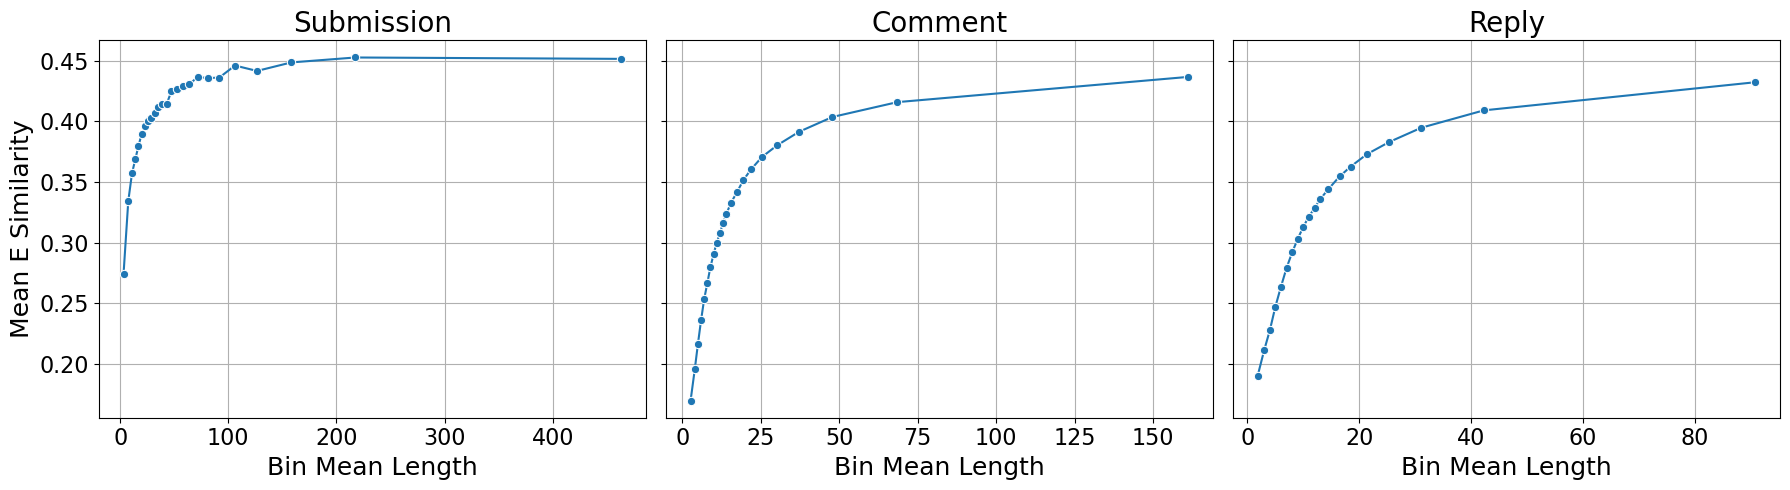

In [53]:
plot_bin_midpoint_vs_similarity_all(df_clipped_no_na, model='finetuned', 
                                    num_bins=25, score_type='E', save = True, clipped = True)

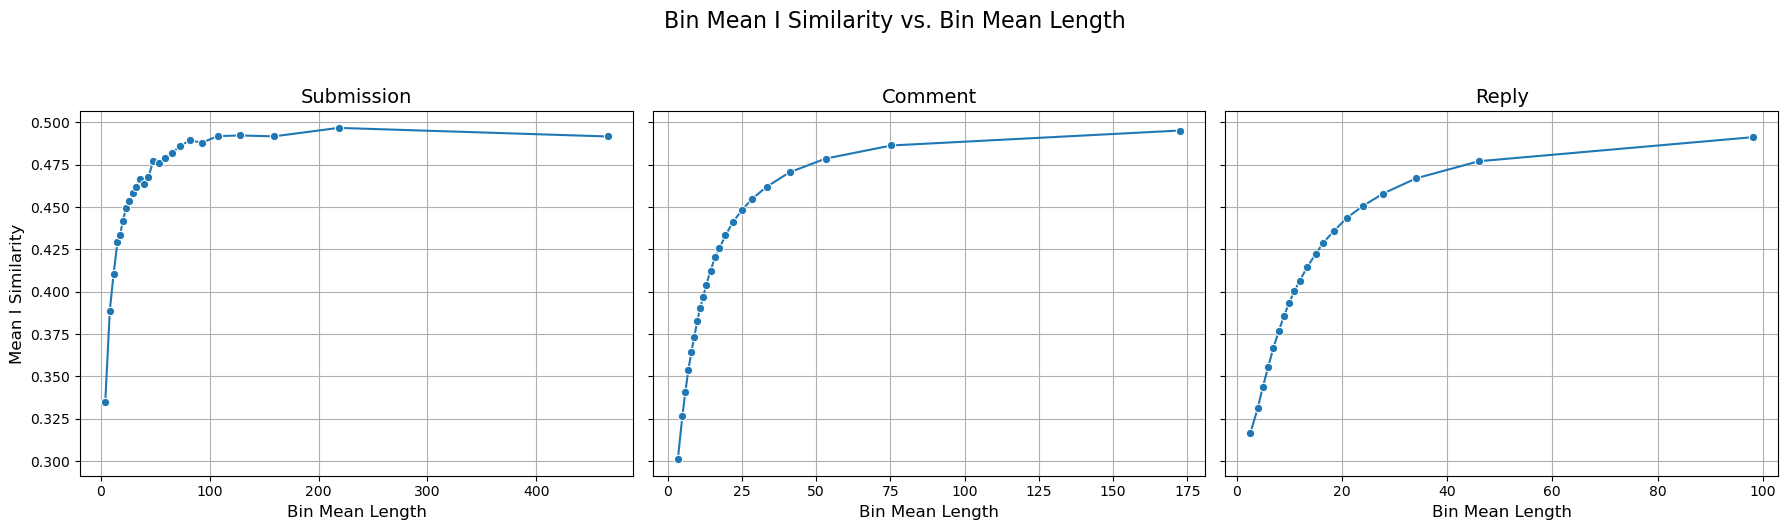

In [46]:
plot_bin_midpoint_vs_similarity_all(df_clipped_no_na, model='finetuned', 
                                    num_bins=25, score_type='I', save = True, clipped = True)


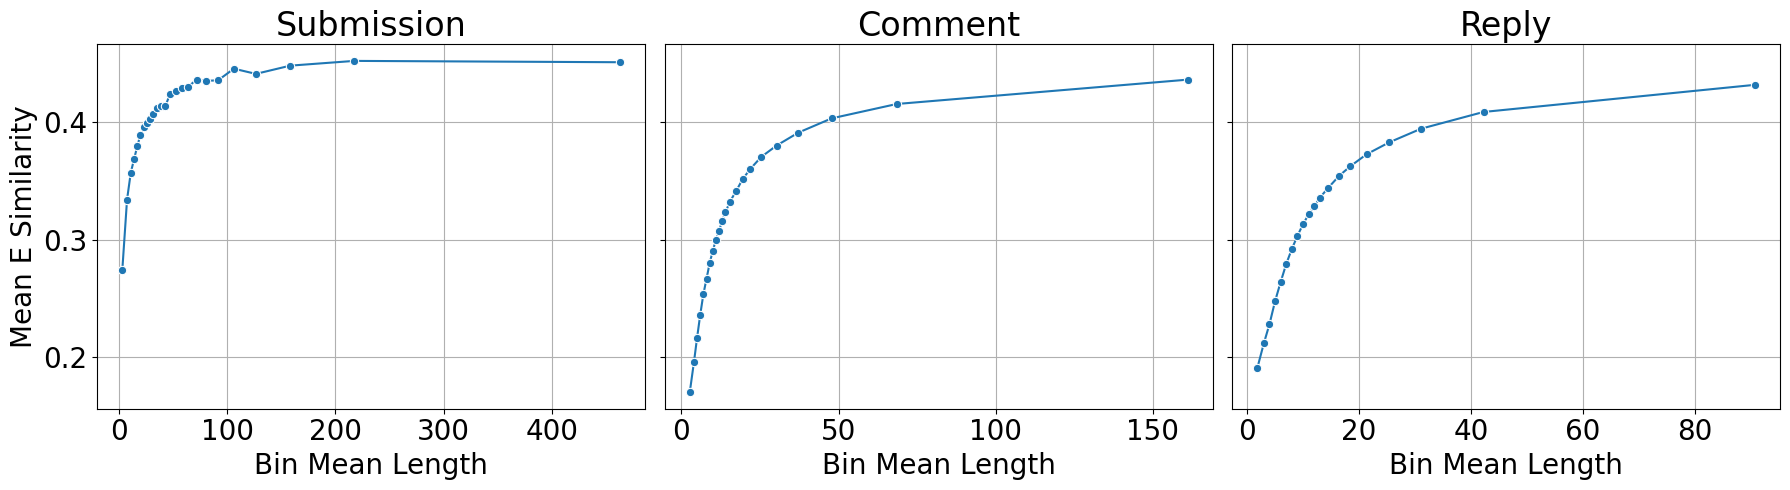

In [57]:
plot_bin_midpoint_vs_similarity_all(df_non_clipped_no_na, model='finetuned', 
                                    num_bins=25, score_type='E', save = True, clipped = False)

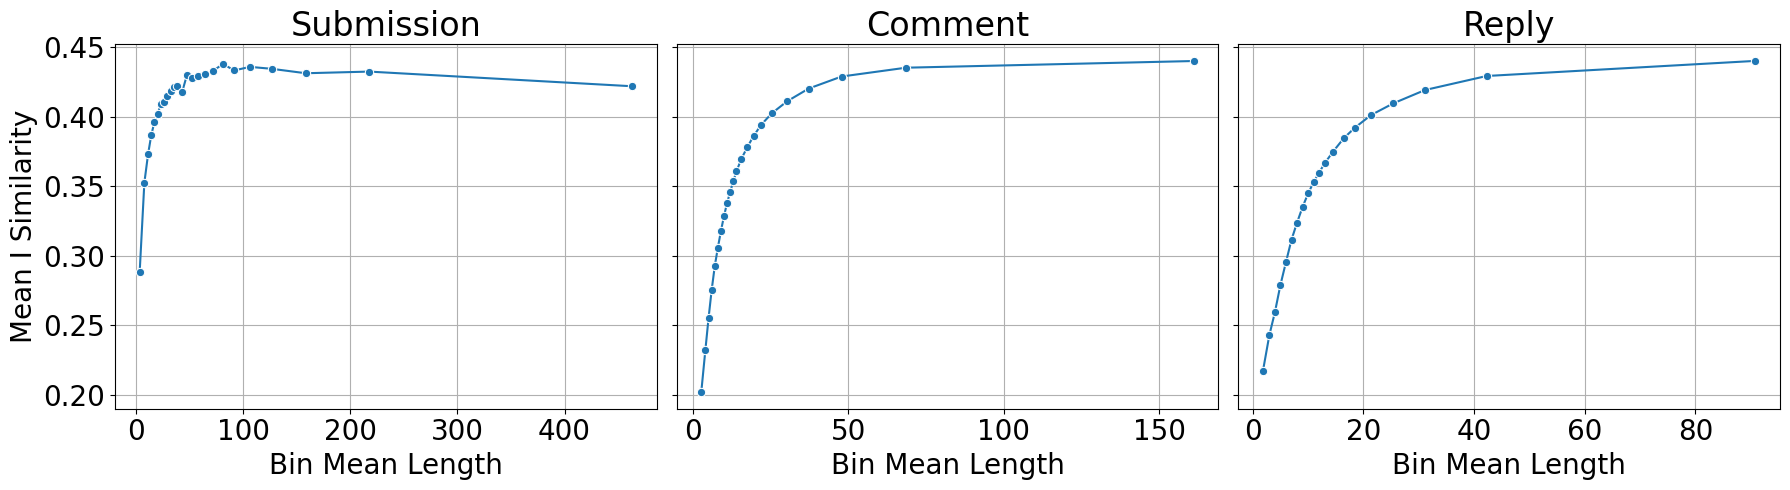

In [59]:
plot_bin_midpoint_vs_similarity_all(df_non_clipped_no_na, model='finetuned', 
                                    num_bins=25, score_type='I', save = True, clipped = False)


In [207]:
# apply clipped

models = ["finetuned", "self"]

for subr in subreddits:
    
    for model in models:
            df_dict_clipped[subr] = length_bin_scores(df_dict_clipped[subr], model, num_bins = 25)

In [210]:
df_dict_clipped['Askpolitics'] 

msg_id_parent msg_id_child submission_id    subreddit  exact_time_child  \
0          c5jo72n      c5k2lfz         x6egl  Askpolitics      1.343363e+09   
1          c5qzrah      c5r2091         xyno1  Askpolitics      1.344609e+09   
2          c5ybl4k      c5yc6u2         xyno1  Askpolitics      1.345854e+09   
3          c66l1tj      c66l5jm         zpguc  Askpolitics      1.347371e+09   
4          c67a2lc      c68eogy         zs6jh  Askpolitics      1.347682e+09   
...            ...          ...           ...          ...               ...   
6349       kfaw4xm      kfawnew       18syt1v  Askpolitics      1.703790e+09   
6350       kff8zac      kffuy1h       18tpoop  Askpolitics      1.703872e+09   
6351       kff8zac      kfgaoss       18tpoop  Askpolitics      1.703878e+09   
6352       kfl1jy0      kflitpm       18ukpy4  Askpolitics      1.703966e+09   
6353       kfp0ros      kfpkcn6       18v6zv6  Askpolitics      1.704038e+09   

          author_child     author_parent    author_submission  \
0           haydensane            meelar    InnocentAlternate   
1             Sernando     expectantyoke             Sernando   
2             Sernando    Ridonkulousley             Sernando   
3     flyingbarmitzvah         pearlhart     flyingbarmitzvah   
4       Ridonkulousley            meelar         will_at_work   
...                ...               ...                  ...   
6349        NerdyKeith  roastbeeftacohat           NerdyKeith   
6350            tnic73       space0watch         MatteaGunnar   
6351          brendbil       space0watch         MatteaGunnar   
6352             FJMMJ  roastbeeftacohat         cryptomelons   
6353          brendbil         apollo151  Spirited-Tackle1669   

                                          parent_tokens  parent_len  ...  \
0     avoiding snarky answers best way figure would ...          42  ...   
1     think anyone integrity care statements mislead...           9  ...   
2     america health care bloated controlled private...         245  ...   
3     aid israel increased steadily past decade coun...          73  ...   
4     something legal mean employer employ someone c...          15  ...   
...                                                 ...         ...  ...   
6349  palestinians pretty far american progressive l...          16  ...   
6350  elected nothing worry legible office treason i...           7  ...   
6351  elected nothing worry legible office treason i...           7  ...   
6352  since obama election made policy job hurt demo...          39  ...   
6353  far right insofar far right politics united st...          87  ...   

     finetuned_submission_I_norm  self_length_bin_child self_child_E_norm  \
0                      -0.132822                     19         -0.156460   
1                       0.229968                      7          0.282209   
2                       0.229968                      6          0.147837   
3                      -0.011768                     19         -0.148063   
4                       0.003794                      8          0.034205   
...                          ...                    ...               ...   
6349                    0.045187                      2          0.049882   
6350                    0.059382                      6         -0.013979   
6351                    0.059382                     12          0.150003   
6352                    0.033310                     14         -0.109210   
6353                   -0.022459                      8         -0.052323   

      self_child_I_norm self_length_bin_parent self_parent_E_norm  \
0             -0.078582                     16          -0.016165   
1              0.143000                      4           0.223198   
2              0.040147                     24           0.156229   
3              0.043016                     20          -0.054216   
4              0.009050                      7           0.072973   
...        

In [211]:
# apply to non clipped

for subr in subreddits:
    
    for model in models:
            df_dict_non_clipped[subr] = length_bin_scores(df_dict_non_clipped[subr], model, num_bins = 25)

In [212]:
df_dict_non_clipped['politics'] 

msg_id_parent msg_id_child submission_id subreddit  \
0             c0ae9r5      c0aeb6y         8tp50  politics   
1             c0aeds9      c0aee4d         8tp50  politics   
2             c0aeds9      c0aeglj         8tp50  politics   
3             c0aeds9      c0aehqw         8tp50  politics   
4             c0aecro      c0aegcb         8tp50  politics   
...               ...          ...           ...       ...   
4171695       kfkh5ib      kfmd52k       18uirzt  politics   
4171696       kfklsb6      kforzbx       18uirzt  politics   
4171697       kfmq5kr      kfp6tzv       18uirzt  politics   
4171698       kfp3d4v      kfp8xh8       18uirzt  politics   
4171699       kfkiulh      kfpvec4       18uirzt  politics   

                      exact_time_child    author_child    author_parent  \
0        1970-01-01 00:00:01.245362278      hyperbolic             pb1x   
1        1970-01-01 00:00:01.245367620       OMFG-Spot        OMFG-Spot   
2        1970-01-01 00:00:01.245373031      hyperbolic        OMFG-Spot   
3        1970-01-01 00:00:01.245375828       rocketvat        OMFG-Spot   
4        1970-01-01 00:00:01.245372428          clorby      Laughsatyou   
...                                ...             ...              ...   
4171695  1970-01-01 00:00:01.703977996   Knightforlife   freddiethebaer   
4171696  1970-01-01 00:00:01.704023024  bakerfredricka       4blockhead   
4171697  1970-01-01 00:00:01.704032059       glassjar1       DoubleTFan   
4171698  1970-01-01 00:00:01.704033069     HaulinBoats       4blockhead   
4171699  1970-01-01 00:00:01.704042289        SMEGHEID  Schwarzes__Loch   

        author_submission                                      parent_tokens  \
0              hyperbolic  reilly actually fisa bush wiretapping issue so...   
1              hyperbolic  course fine olbermann occasionally criticize o...   
2              hyperbolic  course fine olbermann occasionally criticize o...   
3              hyperbolic  course fine olbermann occasionally criticize o...   
4              hyperbolic  wah fox news people anything better lives whin...   
...                   ...                                                ...   
4171695          optimalg      jen sorensen future veterans information wars   
4171696          optimalg    yakima herald republic papers syndicate koterba   
4171697          optimalg                   courtesy star tribune steve sack   
4171698          optimalg               doonesbury trudeau explain like five   
4171699          optimalg  michael ramirez christmas returns caption leas...   

         parent_len  ... finetuned_submission_I_norm  self_length_bin_child  \
0                25  ...                    0.140312                     17   
1                69  ...                    0.140312                     18   
2                69  ...                    0.140312                      9   
3                69  ...                    0.140312                     14   
4                12  ...                    0.140312                     12   
...             ...  ...                         ...                    ...   
4171695           6  ...                   -0.064127                      6   
4171696           6  ...                   -0.064127                      2   
4171697           5  ...                   -0.064127                     18   
4171698           5  ...                   -0.064127                     12   
4171699          13  ...                   -0.064127                      4   

        self_child_E_norm  self_child_I_norm self_length_bin_parent  \
0               -0.038558           0.105597                     16   
1                0.076446           0.327016                     19   
2                0.110964           0.149779                     19   
3                0.057196           0.241552                     19   
4               -0.051611           0.034148                      9   
...                   ... 

## **Compute EMI, then z-transform**

In [213]:

def EMI_then_z_trans(data, model, text_type):

    data[f"{model}_{text_type}_len_norm_EMI"] = data[f"{model}_{text_type}_E_norm"] - data[f"{model}_{text_type}_I_norm"]

    data[f"{model}_{text_type}_len_EMI_z_trans"] = data[f"{model}_{text_type}_len_norm_EMI"].transform(lambda x: ((x - x.mean())/ x.std()))
    


models = ["finetuned", "self"]
texts = ["parent", "child", "submission"]


In [214]:
# apply clipped

for subr in subreddits:
    for m in models:
        for t in texts:
            EMI_then_z_trans(df_dict_clipped[subr], m, t)
            


In [215]:
df_dict_clipped["politics"]

msg_id_parent msg_id_child submission_id subreddit  \
0             c0ae9r5      c0aeb6y         8tp50  politics   
1             c0aeds9      c0aee4d         8tp50  politics   
2             c0aeds9      c0aeglj         8tp50  politics   
3             c0aeds9      c0aehqw         8tp50  politics   
4             c0aecro      c0aegcb         8tp50  politics   
...               ...          ...           ...       ...   
4171695       kfkh5ib      kfmd52k       18uirzt  politics   
4171696       kfklsb6      kforzbx       18uirzt  politics   
4171697       kfmq5kr      kfp6tzv       18uirzt  politics   
4171698       kfp3d4v      kfp8xh8       18uirzt  politics   
4171699       kfkiulh      kfpvec4       18uirzt  politics   

                      exact_time_child    author_child    author_parent  \
0        1970-01-01 00:00:01.245362278      hyperbolic             pb1x   
1        1970-01-01 00:00:01.245367620       OMFG-Spot        OMFG-Spot   
2        1970-01-01 00:00:01.245373031      hyperbolic        OMFG-Spot   
3        1970-01-01 00:00:01.245375828       rocketvat        OMFG-Spot   
4        1970-01-01 00:00:01.245372428          clorby      Laughsatyou   
...                                ...             ...              ...   
4171695  1970-01-01 00:00:01.703977996   Knightforlife   freddiethebaer   
4171696  1970-01-01 00:00:01.704023024  bakerfredricka       4blockhead   
4171697  1970-01-01 00:00:01.704032059       glassjar1       DoubleTFan   
4171698  1970-01-01 00:00:01.704033069     HaulinBoats       4blockhead   
4171699  1970-01-01 00:00:01.704042289        SMEGHEID  Schwarzes__Loch   

        author_submission                                      parent_tokens  \
0              hyperbolic  reilly actually fisa bush wiretapping issue so...   
1              hyperbolic  course fine olbermann occasionally criticize o...   
2              hyperbolic  course fine olbermann occasionally criticize o...   
3              hyperbolic  course fine olbermann occasionally criticize o...   
4              hyperbolic  wah fox news people anything better lives whin...   
...                   ...                                                ...   
4171695          optimalg      jen sorensen future veterans information wars   
4171696          optimalg    yakima herald republic papers syndicate koterba   
4171697          optimalg                   courtesy star tribune steve sack   
4171698          optimalg               doonesbury trudeau explain like five   
4171699          optimalg  michael ramirez christmas returns caption leas...   

         parent_len  ... finetuned_child_len_norm_EMI  \
0                25  ...                    -0.048411   
1                69  ...                    -0.128410   
2                69  ...                     0.191939   
3                69  ...                    -0.073630   
4                12  ...                    -0.081108   
...             ...  ...                          ...   
4171695           6  ...                     0.071061   
4171696           6  ...                    -0.016150   
4171697           5  ...                    -0.004600   
4171698           5  ...                    -0.069557   
4171699          13  ...                     0.055436   

         finetuned_child_len_EMI_z_trans finetuned_submission_len_norm_EMI  \
0                              -0.612221                         -0.029609   
1                              -1.626293                         -0.029609   
2                               2.434457                         -0.029609   
3                              -0.931905                         -0.029609   
4                              -1.026693                         -0.029609   
...                                  ...                               ...   
4171695                         0.902199                          0.072097   
4171696                        -0.203290                          0.072097   
4171697       

In [216]:
for subr in subreddits:
    for m in models:
        for t in texts:
            EMI_then_z_trans(df_dict_non_clipped[subr], m, t)
            

In [217]:
df_dict_non_clipped["Ask_Politics"]

msg_id_parent msg_id_child submission_id     subreddit  \
0           c7ecp8d      c7ecs2n        14m325  Ask_Politics   
1           c7ecp8d      c7ecxpk        14m325  Ask_Politics   
2           c7ecp8d      c7eflag        14m325  Ask_Politics   
3           c7efx8q      c7ejh1d        14m325  Ask_Politics   
4           c7efx8q      c7f8140        14m325  Ask_Politics   
...             ...          ...           ...           ...   
54198       jw3iofg      k8f1j20       15frtsy  Ask_Politics   
54199       fcyrekh      k8kje6m        ejj4xd  Ask_Politics   
54200       k9fz0e9      k9wo2gy       17w3s8o  Ask_Politics   
54201       k9fz0e9      kb8de02       17w3s8o  Ask_Politics   
54202       k9n9hx4      k9xzggt       17w3s8o  Ask_Politics   

       exact_time_child          author_child         author_parent  \
0          1.355167e+09             karmanaut          Ramblin_Dash   
1          1.355167e+09          zoolander951          Ramblin_Dash   
2          1.355175e+09               zossima          Ramblin_Dash   
3          1.355188e+09          fathermocker       senatorskeletor   
4          1.355286e+09                PKMKII       senatorskeletor   
...                 ...                   ...                   ...   
54198      1.699481e+09         thisfunnieguy               Evil_B2   
54199      1.699571e+09      Busy-Factor-2542      Scottlikessports   
54200      1.700413e+09  SecondGuesserIsBack2  Educational-Dance-61   
54201      1.701241e+09         Sarasota33907  Educational-Dance-61   
54202      1.700432e+09            zaplayer20        Porkchopper913   

      author_submission                                      parent_tokens  \
0             karmanaut  regarding perry vs brown current name prop cas...   
1             karmanaut  regarding perry vs brown current name prop cas...   
2             karmanaut  regarding perry vs brown current name prop cas...   
3             karmanaut  suspect going split baby striking doma upholdi...   
4             karmanaut  suspect going split baby striking doma upholdi...   
...                 ...                                                ...   
54198    Based_Neurosis  doesnt even matter real goal banana republic d...   
54199           Hapouch  president declare war congress get choose batt...   
54200      All_bound_up  like witness humans know magats know intimidat...   
54201      All_bound_up  like witness humans know magats know intimidat...   
54202      All_bound_up  yes think possible attorneys actually brains c...   

       parent_len  ... finetuned_child_len_norm_EMI  \
0              65  ...                    -0.019818   
1              65  ...                     0.038732   
2              65  ...                     0.063875   
3             123  ...                     0.006305   
4             123  ...                     0.073351   
...           ...  ...                          ...   
54198          18  ...                     0.031967   
54199          30  ...                    -0.057734   
54200          19  ...                    -0.068569   
54201          19  ...                    -0.039560   
54202          27  ...                     0.237075   

       finetuned_child_len_EMI_z_trans finetuned_submission_len_norm_EMI  \
0                            -0.232963                          0.058939   
1                             0.455305                          0.058939   
2                             0.750873                          0.058939   
3                             0.074120                          0.058939   
4                             0.862266                          0.058939   
...                                ...                               ...   
54198                         0.375777                          0.135659   
54199                        -0.678686                          0.003777   
54200                        -0.806055                          0.176840   
54201                     

## **First, z-transform, then EMI**

In [218]:
def z_transform_then_EMI(data, model, text_type):

    data[f"{model}_{text_type}_E_z_trans"] = data[f"{model}_{text_type}_E_norm"].transform(lambda x: ((x - x.mean())/ x.std()))
    data[f"{model}_{text_type}_I_z_trans"] = data[f"{model}_{text_type}_I_norm"].transform(lambda x: ((x - x.mean())/ x.std()))
    
    data[f"{model}_{text_type}_len_norm_z_trans_EMI"] = data[f"{model}_{text_type}_E_z_trans"] - data[f"{model}_{text_type}_I_z_trans"]



models = ["finetuned", "self"]
texts = ["parent", "child", "submission"]

In [219]:
# clipped

for subr in subreddits:
    for m in models:
        for t in texts:
            z_transform_then_EMI(df_dict_clipped[subr], m, t)

In [61]:
df_dict_clipped["Ask_Politics"]


msg_id_parent msg_id_child submission_id     subreddit  \
0           c7ecp8d      c7ecs2n        14m325  Ask_Politics   
1           c7ecp8d      c7ecxpk        14m325  Ask_Politics   
2           c7ecp8d      c7eflag        14m325  Ask_Politics   
3           c7efx8q      c7ejh1d        14m325  Ask_Politics   
4           c7efx8q      c7f8140        14m325  Ask_Politics   
...             ...          ...           ...           ...   
54198       jw3iofg      k8f1j20       15frtsy  Ask_Politics   
54199       fcyrekh      k8kje6m        ejj4xd  Ask_Politics   
54200       k9fz0e9      k9wo2gy       17w3s8o  Ask_Politics   
54201       k9fz0e9      kb8de02       17w3s8o  Ask_Politics   
54202       k9n9hx4      k9xzggt       17w3s8o  Ask_Politics   

       exact_time_child          author_child         author_parent  \
0          1.355167e+09             karmanaut          Ramblin_Dash   
1          1.355167e+09          zoolander951          Ramblin_Dash   
2          1.355175e+09               zossima          Ramblin_Dash   
3          1.355188e+09          fathermocker       senatorskeletor   
4          1.355286e+09                PKMKII       senatorskeletor   
...                 ...                   ...                   ...   
54198      1.699481e+09         thisfunnieguy               Evil_B2   
54199      1.699571e+09      Busy-Factor-2542      Scottlikessports   
54200      1.700413e+09  SecondGuesserIsBack2  Educational-Dance-61   
54201      1.701241e+09         Sarasota33907  Educational-Dance-61   
54202      1.700432e+09            zaplayer20        Porkchopper913   

      author_submission                                      parent_tokens  \
0             karmanaut  regarding perry vs brown current name prop cas...   
1             karmanaut  regarding perry vs brown current name prop cas...   
2             karmanaut  regarding perry vs brown current name prop cas...   
3             karmanaut  suspect going split baby striking doma upholdi...   
4             karmanaut  suspect going split baby striking doma upholdi...   
...                 ...                                                ...   
54198    Based_Neurosis  doesnt even matter real goal banana republic d...   
54199           Hapouch  president declare war congress get choose batt...   
54200      All_bound_up  like witness humans know magats know intimidat...   
54201      All_bound_up  like witness humans know magats know intimidat...   
54202      All_bound_up  yes think possible attorneys actually brains c...   

       parent_len  ... finetuned_submission_len_norm_z_trans_EMI  \
0              65  ...                                  0.179095   
1              65  ...                                  0.179095   
2              65  ...                                  0.179095   
3             123  ...                                  0.179095   
4             123  ...                                  0.179095   
...           ...  ...                                       ...   
54198          18  ...                                  1.442123   
54199          30  ...                                  0.818581   
54200          19  ...                                  1.931281   
54201          19  ...                                  1.931281   
54202          27  ...                                  1.931281   

       self_parent_E_z_trans self_parent_I_z_trans  \
0                   1.988753              0.774653   
1                   1.988753              0.774653   
2                   1.988753              0.774653   
3                   0.842111             -0.391777   
4                   0.842111             -0.391777   
...                      ...                   ...   
54198              -0.494542              0.080724   
54199               0.727107              0.935461   
54200               1.146561              0.517785   
54201               1.146561              0.517785   
54202               2.436105        

In [220]:
# non clipped

for subr in subreddits:
    for m in models:
        for t in texts:
            z_transform_then_EMI(df_dict_non_clipped[subr], m, t)

## **Import Classification Labels**

In [225]:

Ask_Politics_labels = pd.read_csv("../../../llama_final/Classification/two_labels/attention_LoRa/output_reddit/Ask_Politics_Llama_3.1_8B_ft_classified.csv")
Askpolitics_labels = pd.read_csv("../../../llama_final/Classification/two_labels/attention_LoRa/output_reddit/Askpolitics_Llama_3.1_8B_ft_classified.csv")

PoliticalDebate_labels = pd.read_csv("../../../llama_final/Classification/two_labels/attention_LoRa/output_reddit/PoliticalDebate_Llama_3.1_8B_ft_classified.csv")
PoliticalDiscussion_labels = pd.read_csv("../../../llama_final/Classification/two_labels/attention_LoRa/output_reddit/PoliticalDiscussion_Llama_3.1_8B_ft_classified.csv")

NeutralPolitics_labels = pd.read_csv("../../../llama_final/Classification/two_labels/attention_LoRa/output_reddit/NeutralPolitics_Llama_3.1_8B_ft_classified.csv")


labels = {
    'Ask_Politics' : Ask_Politics_labels,
    'Askpolitics' : Askpolitics_labels,
    'PoliticalDiscussion' : PoliticalDiscussion_labels,
    'PoliticalDebate' : PoliticalDebate_labels,
    'NeutralPolitics' : NeutralPolitics_labels,
    #'politics' : politics_labels
    
}

In [226]:

# politics missing labels

politics_labels = pd.DataFrame()

for i in range(6):
    part = pd.read_csv(f"../../../llama_final/Classification/two_labels/attention_LoRa/output_reddit/politics_{i}_Llama_3.1_8B_ft_classified.csv")
    politics_labels = pd.concat([politics_labels, part]).reset_index(drop = True)


politics_labels


labels['politics'] = politics_labels

In [223]:
def merge_labels(df_EMI, df_classify):
    
    result = df_EMI.merge(df_classify[['msg_id_parent', "msg_id_child", "submission_id", "predictions_score_ft", "predictions_ft"]],
                          left_on = ['msg_id_parent', "msg_id_child", "submission_id"], 
                          right_on = ['msg_id_parent', "msg_id_child", "submission_id"],
                          how = "left")
    return result 



In [227]:
final_dict_clipped = {}

for subr in subreddits:
    final_dict_clipped[subr] = merge_labels(df_dict_clipped[subr], labels[subr]) 


In [228]:
final_dict_non_clipped = {}

for subr in subreddits:
    final_dict_non_clipped[subr] = merge_labels(df_dict_non_clipped[subr], labels[subr]) 


## **SAVE**

In [229]:
final_dict_clipped['politics'].columns

Index(['msg_id_parent', 'msg_id_child', 'submission_id', 'subreddit',
       'exact_time_child', 'author_child', 'author_parent',
       'author_submission', 'parent_tokens', 'parent_len', 'child_tokens',
       'child_len', 'submission_tokens', 'submission_len',
       'finetuned_parent_E_emb', 'finetuned_parent_I_emb',
       'finetuned_child_E_emb', 'finetuned_child_I_emb',
       'finetuned_submission_E_emb', 'finetuned_submission_I_emb',
       'self_parent_E_emb', 'self_parent_I_emb', 'self_child_E_emb',
       'self_child_I_emb', 'self_submission_E_emb', 'self_submission_I_emb',
       'finetuned_parent_E', 'finetuned_parent_I', 'finetuned_child_E',
       'finetuned_child_I', 'finetuned_submission_E', 'finetuned_submission_I',
       'self_parent_E', 'self_parent_I', 'self_child_E', 'self_child_I',
       'self_submission_E', 'self_submission_I', 'finetuned_length_bin_child',
       'finetuned_child_E_norm', 'finetuned_child_I_norm',
       'finetuned_length_bin_parent', 'finet

In [194]:
#df_dict_clipped["Ask_Politics"].columns[:50]


In [72]:
# relevant columns regarding filtered tokens 


relevant_columns = ['msg_id_parent', 'msg_id_child', 'submission_id', 'subreddit', 'exact_time_child', 
                   'author_child', 'author_parent', 'author_submission',
                   
                    'parent_tokens', 'parent_len', 
                    'child_tokens', 'child_len', 
                    'submission_tokens', 'submission_len', 
                    
                    'finetuned_parent_tokens_for_E', 'finetuned_parent_tokens_for_I', 
                    'finetuned_child_tokens_for_E', 'finetuned_child_tokens_for_I', 
                    'finetuned_submission_tokens_for_E', 'finetuned_submission_tokens_for_I', 
                    
                    'self_parent_tokens_for_E', 'self_parent_tokens_for_I', 
                    'self_child_tokens_for_E', 'self_child_tokens_for_I', 
                    'self_submission_tokens_for_E', 'self_submission_tokens_for_I'
                   ]


for subr in subreddits:

    df_dict_clipped[subr][relevant_columns].to_csv(f"output_clipped/{subr}_tokens.csv", index = False)

In [230]:


# relevant columns regarding EMI scores and labels

relevant_EMI_columns = ['msg_id_parent', 'msg_id_child', 'submission_id', 'subreddit', 'exact_time_child', 
                   'author_child', 'author_parent', 'author_submission',
                        
                   'finetuned_child_E_norm', 'finetuned_child_I_norm',
                   'finetuned_parent_E_norm', 'finetuned_parent_I_norm',
                   'finetuned_submission_E_norm', 'finetuned_submission_I_norm',

                    'self_child_E_norm', 'self_child_I_norm', 
                    'self_parent_E_norm', 'self_parent_I_norm',
                    'self_submission_E_norm', 'self_submission_I_norm',

                    'finetuned_parent_len_EMI_z_trans', 'finetuned_child_len_EMI_z_trans', 'finetuned_submission_len_EMI_z_trans', 
                    'self_parent_len_EMI_z_trans', 'self_child_len_EMI_z_trans', 'self_submission_len_EMI_z_trans',

                    'finetuned_parent_len_norm_z_trans_EMI', 'finetuned_child_len_norm_z_trans_EMI', 'finetuned_submission_len_norm_z_trans_EMI',
                    'self_parent_len_norm_z_trans_EMI', 'self_child_len_norm_z_trans_EMI', 'self_submission_len_norm_z_trans_EMI',

                    'predictions_score_ft', 'predictions_ft']




In [231]:
for subr in subreddits:

    final_dict_clipped[subr][relevant_EMI_columns].to_csv(f"output_clipped/{subr}_EMI.csv", index = False)
    

In [232]:


for subr in subreddits:

    final_dict_non_clipped[subr][relevant_EMI_columns].to_csv(f"output_non_clipped/{subr}_EMI.csv", index = False)



***
***
***